# INFORMACIÓN DEL PROYECTO

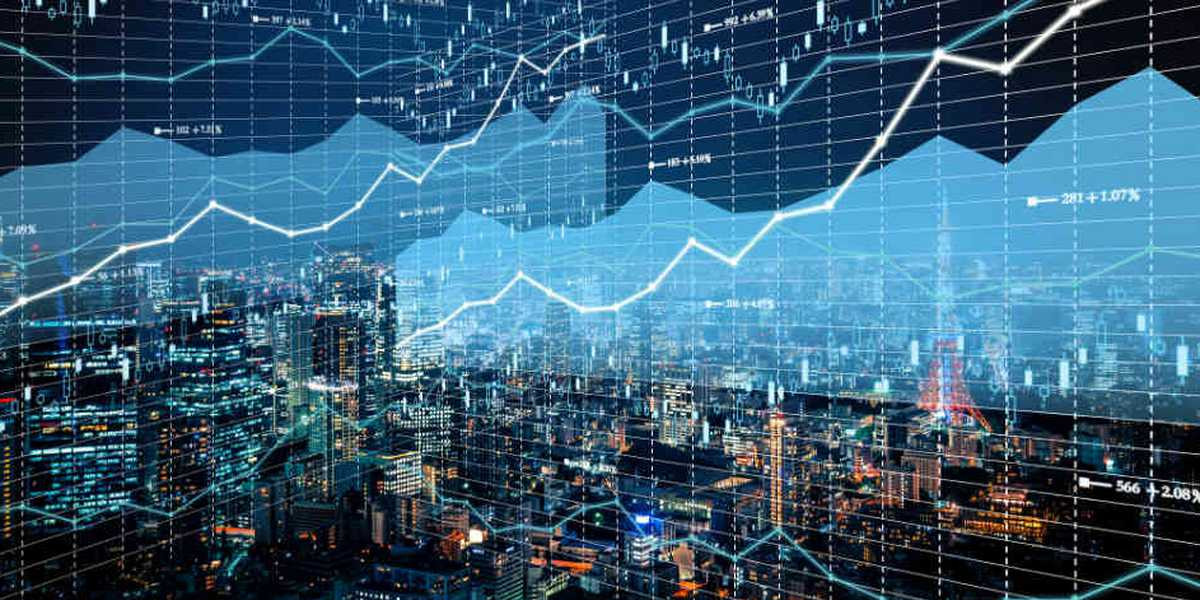

In [95]:
from IPython.display import Image

ruta_imagen = "Data/Imagen portada.jpg"
Image(filename=ruta_imagen)

#### TÍTULO:

## CICLO INMOBILIARIO - Mercado Residencial en España


#### TEMA:

**Breve descipcion del proyecto:**

El sector inmobiliario se ocupa de la adquisición, desarrollo, gestión, promoción, venta y alquiler de bienes raíces, que incluyen terrenos, edificios y propiedades. Este sector se define por la inversión en activos inmobiliarios con el objetivo de obtener rendimientos económicos, ya sea a través de la compra y venta de propiedades, su alquiler, o el desarrollo y construcción de nuevos proyectos.

Este sector, es esencial en la economía española y se caracteriza por su dinamismo, ciclicidad y la influencia de factores económicos y sociales en su evolución, así como por una importante vinculación geográfica, que, en ocasiones, genera grandes diferencias entre unas comunidades autónomas y otras, en cuestiones de toda índole.

Es por tanto un sector complejo, al que nosotros, a través del presente proyecto, nos vamos a acercar, de forma generalista, centrándonos en el área residencial, y analizando las variables principales que mueven el ciclo inmobiliario, y cómo se interelacionan entre ellas:

>- El mercado inmobiliario es sensible a las condiciones económicas y sociales generales, como el PIB, las tasas de  salario medio etc, y su ciclo vital se determina por la relación entre las mismas con las que reflejan la dinamica entre la oferta y la demanda en el mercado, como son las compraventas y por extensión el precio. Ambos grupos de variables, no sólo estás correlacionados, sino que tienden a influirse mutuamente.

<b>
Es importante para los inversores y profesionales del sector inmobiliario comprender estas interrelaciones para tomar decisiones informadas en un mercado en constante evolución y éste es el fundamento principal de este proyecto:




#### HIPÓTESIS:

Objetivo principal: 
 > Comprender el funcionamiento del CICLO INMOBILIARIO.

- Analizar la vinculación entre las variables principales que operan en el ciclo inmobiliario residencial.

Se pretende sentar las bases para la creación de un futuro modelo, al que se le vaya suministrando información de todas esta variables, con el objeto, no sólo de poder hacer previsiones de ventas de inmuebles, precios, volumen de prestamos hipotecarios y demás, sino también de predecir o anticiparse a posibles cambios de ciclo, que influyan sobre las previsiones iniciales.



 Objetivo/s secundario/s: 
 - Analizar lo acontecido en esta última década, a través de indicadores habituales, por año y por comunidad autónoma,  y comprobar el grado de tensión financiera que existe en España de cara al la compra de vivienda libre.


Para tal fin, comenzaremos con la lectura, analisis, procesamiento y formateo del dataset, a la identificación de variables para el Análisis Univariante inicial, y poder proceder con posterioirdad a estudir la correlación de las mismas y realizar el Análisis Multivariante, que nos permita sacar las conclusiones finales.

##### Paquetes utilizados:
- Procesamiento de datos: Pandas.
- Visualización de datos: Seaborn y Matplotlib.

### 1 LECTURA, LIMPIEZA Y FORMATEO DE DATASET

Seguidamente se identifican el/los datasets que sirven de partida para poder evaluar nuestra hipótesis. <br>

También incluye el origen de estos datos y su fuente.

     
Fuente Principal = REGISTRO DE LA PROPIEDAD
        'https://www.euskadi.eus/contenidos/estadistica/ovv_registral/opendata.csv'
> df_0 = pd.read_csv("Data/DF_0_Datos Registro.csv")

En la base anterior, ha sido necesario incorporar datos de salarios e indice de precios de vivienda del INE y datos de intereses del Banco de España

 - Fuente 2 = BANCO DE ESPAÑA 
        'https://www.bde.es/webbe/es/estadisticas/temas/tipos-interes.html'

 - Fuente 3 = INE Instituto Nacional de Estadistica
        'https://www.ine.es/dyngs/INEbase/listaoperaciones.htm'
                

En la carpeta de data se aportan todos los archivos csv. Incialmente, se comenzó vinculanado los mismos desde la web, pero fue el fraccionamiento de información mostrada en ellos, (que además era irregular de un trimestre a otro), lo que dificultaba en exceso la carga de de los archivos para la creación del dataframe base. Por este motivo, se realizó un refundido de los mismos, uniéndolos de forma manual, con la idea de implemntar en el futuro, la lectura directa de la web y automatizar estas descargas, asi como recoger mas información de las fuentes que se requieran para que el volumen de información sea mayor y sus resultados más concluyentes.


---------------------------------------------------------------------------------------

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import merge
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot


#### CARGA DE DATASETS:

Procedemos a la lectura de los archivos y depuración posterior:

    Dataframe Base:

In [97]:
df_0 = pd.read_csv("Data/DF_0.csv", sep=';',encoding='latin-1',skiprows=0)

Desde la propia llamada especificamos el delimitador que separa los valores del archivo, n la propia lectura, se especifica su codificacion, y se fijan el numero de filas a omitir para evitar titulos y visualizo archivo para ver resultado.

In [98]:
df_0.head()

AÑO TRIMESTRE          CONCEPTO  DESGLOSE      AMBITO VIV GENERAL  \
0  2023        T2  Num compraventas  Nacional      ESPAÑA      151983   
1  2023        T2  Num compraventas      CCAA  PAIS VASCO        5038   
2  2023        T2  Num compraventas      CCAA   ANDALUCIA       30698   
3  2023        T2  Num compraventas      CCAA      ARAGON        3966   
4  2023        T2  Num compraventas      CCAA    ASTURIAS        3145   

  VIV NUEVA VIV USADA CUOTA MES COSTE SALARIAL PORCNT SB ING PLAZO M INTERES  \
0     28739    123244      n.d.           n.d.          n.d.    n.d.    n.d.   
1       663      4375      n.d.           n.d.          n.d.    n.d.    n.d.   
2      6269     24429      n.d.           n.d.          n.d.    n.d.    n.d.   
3       819      3147      n.d.           n.d.          n.d.    n.d.    n.d.   
4       656      2489      n.d.           n.d.          n.d.    n.d.    n.d.   

  PIB anual(M) VAR PIB PIB PER CAPITA VAR ANUAL PER CAPITA SAL MEDIO  
0         n.d.    n.d.           n.d.                 n.d.      n.d.  
1         n.d.    n.d.           n.d.                 n.d.      n.d.  
2         n.d.    n.d.           n.d.                 n.d.      n.d.  
3         n.d.    n.d.           n.d.                 n.d.      n.d.  
4         n.d.    n.d.           n.d.                 n.d.      n.d.

In [99]:
df_0.shape

(8367, 18)

Acoto número de columnas

In [100]:
# Acoto numero de columnas
df_0= df_0.iloc[:, 0:18] # Primeras x columnas

In [101]:
df_0.head()

AÑO TRIMESTRE          CONCEPTO  DESGLOSE      AMBITO VIV GENERAL  \
0  2023        T2  Num compraventas  Nacional      ESPAÑA      151983   
1  2023        T2  Num compraventas      CCAA  PAIS VASCO        5038   
2  2023        T2  Num compraventas      CCAA   ANDALUCIA       30698   
3  2023        T2  Num compraventas      CCAA      ARAGON        3966   
4  2023        T2  Num compraventas      CCAA    ASTURIAS        3145   

  VIV NUEVA VIV USADA CUOTA MES COSTE SALARIAL PORCNT SB ING PLAZO M INTERES  \
0     28739    123244      n.d.           n.d.          n.d.    n.d.    n.d.   
1       663      4375      n.d.           n.d.          n.d.    n.d.    n.d.   
2      6269     24429      n.d.           n.d.          n.d.    n.d.    n.d.   
3       819      3147      n.d.           n.d.          n.d.    n.d.    n.d.   
4       656      2489      n.d.           n.d.          n.d.    n.d.    n.d.   

  PIB anual(M) VAR PIB PIB PER CAPITA VAR ANUAL PER CAPITA SAL MEDIO  
0         n.d.    n.d.           n.d.                 n.d.      n.d.  
1         n.d.    n.d.           n.d.                 n.d.      n.d.  
2         n.d.    n.d.           n.d.                 n.d.      n.d.  
3         n.d.    n.d.           n.d.                 n.d.      n.d.  
4         n.d.    n.d.           n.d.                 n.d.      n.d.

Compruebo valores faltantes y tipo de objetos

In [102]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   AÑO                   8367 non-null   int64 
 1   TRIMESTRE             8367 non-null   object
 2   CONCEPTO              8367 non-null   object
 3   DESGLOSE              8367 non-null   object
 4   AMBITO                8367 non-null   object
 5   VIV GENERAL           8367 non-null   object
 6   VIV NUEVA             8367 non-null   object
 7   VIV USADA             8367 non-null   object
 8   CUOTA MES             8367 non-null   object
 9   COSTE SALARIAL        8367 non-null   object
 10  PORCNT SB ING         8367 non-null   object
 11  PLAZO M               8365 non-null   object
 12  INTERES               8367 non-null   object
 13  PIB anual(M)          8367 non-null   object
 14  VAR PIB               8367 non-null   object
 15  PIB PER CAPITA        8367 non-null   

Del cuadro anterior, observo dos cosas: 
- 1: Como consecuencia del origen "oficial" del archivo, el número de nulos es poco significativo. Se procede con ellos en cualquier caso.
- 2: La mayoria de columnas son de tipo "object", que para valores numéricos habrá que convertir.

In [103]:
# corrijo errores de escritura
columns_to_clean = ['VIV GENERAL', 'VIV NUEVA', 'VIV USADA', 'CUOTA MES', 'COSTE SALARIAL', 'PORCNT SB ING', 'PLAZO M', 'INTERES', 'PIB anual(M)', 'VAR PIB', 'PIB PER CAPITA', 'VAR ANUAL PER CAPITA','SAL MEDIO']
for column in columns_to_clean:
    df_0[column] = df_0[column].replace(['n.d.', '-',''], '0')

In [104]:
columns_to_clean = ['VIV GENERAL', 'VIV NUEVA', 'VIV USADA', 'CUOTA MES', 'COSTE SALARIAL', 'PORCNT SB ING', 'PLAZO M', 'INTERES', 'PIB anual(M)', 'VAR PIB', 'PIB PER CAPITA', 'VAR ANUAL PER CAPITA','SAL MEDIO']
for column in columns_to_clean:
    df_0[column] = pd.to_numeric(df_0[column], errors='coerce')

In [105]:
df_0.fillna(0, inplace=True)

In [106]:
df_0.columns.unique

<bound method Index.unique of Index(['AÑO', 'TRIMESTRE', 'CONCEPTO', 'DESGLOSE', 'AMBITO', 'VIV GENERAL',
       'VIV NUEVA', 'VIV USADA', 'CUOTA MES', 'COSTE SALARIAL',
       'PORCNT SB ING', 'PLAZO M', 'INTERES', 'PIB anual(M)', 'VAR PIB',
       'PIB PER CAPITA', 'VAR ANUAL PER CAPITA', 'SAL MEDIO'],
      dtype='object')>

In [107]:
df_0['VIV GENERAL'] = df_0['VIV GENERAL'].astype(float)
df_0['VIV NUEVA'] = df_0['VIV NUEVA'].astype(float)
df_0['VIV USADA'] = df_0['VIV USADA'].astype(float)
df_0['CUOTA MES'] = df_0['CUOTA MES'].astype(float)
df_0['COSTE SALARIAL'] = df_0['COSTE SALARIAL'].astype(float)
df_0['PORCNT SB ING'] = df_0['PORCNT SB ING'].astype(float)
df_0['PLAZO M'] = df_0['PLAZO M'].astype(float)
df_0['INTERES'] = df_0['INTERES'].astype(float)
df_0['PIB anual(M)'] = df_0['PIB anual(M)'].astype(float)
df_0['VAR PIB'] = df_0['VAR PIB'].astype(float)
df_0['PIB PER CAPITA'] = df_0['PIB PER CAPITA'].astype(float)
df_0['VAR ANUAL PER CAPITA'] = df_0['VAR ANUAL PER CAPITA'].astype(float)
df_0['SAL MEDIO'] = df_0['SAL MEDIO'].astype(float)
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AÑO                   8367 non-null   int64  
 1   TRIMESTRE             8367 non-null   object 
 2   CONCEPTO              8367 non-null   object 
 3   DESGLOSE              8367 non-null   object 
 4   AMBITO                8367 non-null   object 
 5   VIV GENERAL           8367 non-null   float64
 6   VIV NUEVA             8367 non-null   float64
 7   VIV USADA             8367 non-null   float64
 8   CUOTA MES             8367 non-null   float64
 9   COSTE SALARIAL        8367 non-null   float64
 10  PORCNT SB ING         8367 non-null   float64
 11  PLAZO M               8367 non-null   float64
 12  INTERES               8367 non-null   float64
 13  PIB anual(M)          8367 non-null   float64
 14  VAR PIB               8367 non-null   float64
 15  PIB PER CAPITA       

La depuración del DataFrame se ha realizado correctamente.

In [108]:
# para asignar el resultado a un nuevo DataFrame y quedarnos solo con los registros de CCAA 
is_CCAA = df_0.loc[:, 'DESGLOSE'] == 'CCAA'
df_1 = df_0.loc[is_CCAA]
df_1.head()


AÑO TRIMESTRE          CONCEPTO DESGLOSE      AMBITO  VIV GENERAL  \
1  2023        T2  Num compraventas     CCAA  PAIS VASCO       5038.0   
2  2023        T2  Num compraventas     CCAA   ANDALUCIA      30698.0   
3  2023        T2  Num compraventas     CCAA      ARAGON       3966.0   
4  2023        T2  Num compraventas     CCAA    ASTURIAS       3145.0   
5  2023        T2  Num compraventas     CCAA    BALEARES       3688.0   

   VIV NUEVA  VIV USADA  CUOTA MES  COSTE SALARIAL  PORCNT SB ING  PLAZO M  \
1      663.0     4375.0        0.0             0.0            0.0      0.0   
2     6269.0    24429.0        0.0             0.0            0.0      0.0   
3      819.0     3147.0        0.0             0.0            0.0      0.0   
4      656.0     2489.0        0.0             0.0            0.0      0.0   
5      751.0     2937.0        0.0             0.0            0.0      0.0   

   INTERES  PIB anual(M)  VAR PIB  PIB PER CAPITA  VAR ANUAL PER CAPITA  \
1      0.0           0.0      0.0             0.0                   0.0   
2      0.0           0.0      0.0             0.0                   0.0   
3      0.0           0.0      0.0             0.0                   0.0   
4      0.0           0.0      0.0             0.0                   0.0   
5      0.0           0.0      0.0             0.0                   0.0   

   SAL MEDIO  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
5        0.0

In [109]:
df_1.shape

(3789, 18)

El dataset esta completo y no cuenta con valores faltantes

In [110]:
print(df_1.isnull().sum())

AÑO                     0
TRIMESTRE               0
CONCEPTO                0
DESGLOSE                0
AMBITO                  0
VIV GENERAL             0
VIV NUEVA               0
VIV USADA               0
CUOTA MES               0
COSTE SALARIAL          0
PORCNT SB ING           0
PLAZO M                 0
INTERES                 0
PIB anual(M)            0
VAR PIB                 0
PIB PER CAPITA          0
VAR ANUAL PER CAPITA    0
SAL MEDIO               0
dtype: int64


Reformateo fichero para quedarnos con las columnas que requiero.


In [111]:
# precio.  
columnas_seleccionadas = ['AÑO','TRIMESTRE', 'AMBITO','VIV GENERAL','VIV NUEVA', 'VIV USADA']
condicion_filtrado = df_1['CONCEPTO'] == 'Precio ud viv' 
df_resultado0 = df_1.loc[condicion_filtrado, columnas_seleccionadas]
df_resultado0.rename(columns={'VIV GENERAL': 'Precio','VIV NUEVA': 'Precio_nueva','VIV USADA': 'Precio_usada'}, inplace=True)

#df_resultado00 =  df_resultado0[df_resultado0['AÑO'] >= 2012]
#df_resultado01 =  df_resultado0[df_resultado0['AÑO'] <= 2023]

df_resultado00 =  df_resultado0[df_resultado0['AÑO'] > 2021]
df_resultado01 =  df_resultado0[df_resultado0['AÑO'] < 2022]

columnas_seleccionadas = ['AÑO', 'AMBITO','Precio','Precio_nueva','Precio_usada']
df_resultado01 = df_resultado01.loc[:, columnas_seleccionadas]
df_resultado01 = df_resultado01.assign(TRIMESTRE = 'T1')

df_resultado02 = df_resultado01.loc[:, columnas_seleccionadas]
df_resultado02 = df_resultado01.assign(TRIMESTRE = 'T2')

df_resultado03 = df_resultado01.loc[:, columnas_seleccionadas]
df_resultado03 = df_resultado01.assign(TRIMESTRE = 'T3')

df_resultado04 = df_resultado01.loc[:, columnas_seleccionadas]
df_resultado04 = df_resultado01.assign(TRIMESTRE = 'T4')

df_resultado0_tot = pd.concat([df_resultado00, df_resultado01], ignore_index=True)
df_resultado0_tot = pd.concat([df_resultado0_tot, df_resultado02], ignore_index=True)
df_resultado0_tot = pd.concat([df_resultado0_tot, df_resultado03], ignore_index=True)
df_resultado0_tot = pd.concat([df_resultado0_tot, df_resultado04], ignore_index=True)

# num compraventas
columnas_seleccionadas = ['AÑO','TRIMESTRE', 'AMBITO','VIV GENERAL','VIV NUEVA', 'VIV USADA']
condicion_filtrado = df_1['CONCEPTO'] == 'Num compraventas'
df_resultado1 = df_1.loc[condicion_filtrado, columnas_seleccionadas]

df_resultado1.rename(columns={'VIV GENERAL': 'Compraventas','VIV NUEVA': 'Comprav_nueva','VIV USADA': 'Comprav_usada'}, inplace=True)
df_resultado1.head()

# interes
columnas_seleccionadas = ['AÑO','TRIMESTRE', 'AMBITO','INTERES']
condicion_filtrado = df_1['CONCEPTO'] == 'Tipo Int'
df_resultado2 = df_1.loc[condicion_filtrado, columnas_seleccionadas]
df_resultado2.rename(columns={'INTERES': 'Interes'}, inplace=True)
df_resultado2.head()

# plazo
columnas_seleccionadas = ['AÑO','TRIMESTRE', 'AMBITO','PLAZO M']
condicion_filtrado = df_1['CONCEPTO'] == 'Ptmo Hip'
df_resultado3 = df_1.loc[condicion_filtrado, columnas_seleccionadas]
df_resultado3.rename(columns={'PLAZO M': 'Plazo'}, inplace=True)
df_resultado3.head()

# salario medio 
columnas_seleccionadas = ['AÑO','AMBITO','SAL MEDIO']
#condicion_filtrado = df_1['CONCEPTO'] == 'Coyuntura'
condicion_filtrado = (df_1['CONCEPTO'] == 'Coyuntura') & (df_1['SAL MEDIO'] > 0)
df_resultado4 = df_1.loc[condicion_filtrado, columnas_seleccionadas]
df_resultado4.rename(columns={'SAL MEDIO': 'Salario'}, inplace=True)
df_resultado4.head()

df_resultado41 = df_resultado4
df_resultado41 = df_resultado41.assign(TRIMESTRE = 'T1')

df_resultado42 = df_resultado4
df_resultado42 = df_resultado41.assign(TRIMESTRE = 'T2')

df_resultado43 = df_resultado4
df_resultado43 = df_resultado41.assign(TRIMESTRE = 'T3')

df_resultado44 = df_resultado4
df_resultado44 = df_resultado41.assign(TRIMESTRE = 'T4')

df_resultado4_tot = pd.concat([df_resultado41, df_resultado42], ignore_index=True)
df_resultado4_tot = pd.concat([df_resultado4_tot, df_resultado43], ignore_index=True)
df_resultado4_tot = pd.concat([df_resultado4_tot, df_resultado44], ignore_index=True)


df_merged = pd.merge(df_resultado0_tot, df_resultado1)  # primer merge

df_merged = pd.merge(df_merged, df_resultado2)


df_merged = pd.merge(df_merged, df_resultado3)  # segundo merge


df_merged = pd.merge(df_merged, df_resultado4_tot)  # tercer merge

df_merged.head()


AÑO TRIMESTRE      AMBITO    Precio  Precio_nueva  Precio_usada  \
0  2023        T2  PAIS VASCO  246322.0      294943.0      239608.0   
1  2023        T2   ANDALUCIA  170051.0      197366.0      162917.0   
2  2023        T2      ARAGON  132212.0      204713.0      114029.0   
3  2023        T2    ASTURIAS  118307.0      157251.0      108439.0   
4  2023        T2    BALEARES  335299.0      351135.0      331182.0   

   Compraventas  Comprav_nueva  Comprav_usada  Interes  Plazo  Salario  
0        5038.0          663.0         4375.0      3.0  291.0   2099.0  
1       30698.0         6269.0        24429.0      3.0  294.0   1624.0  
2        3966.0          819.0         3147.0      3.0  292.0   1720.0  
3        3145.0          656.0         2489.0      3.0  300.0   1779.0  
4        3688.0          751.0         2937.0      3.0  283.0   1721.0

In [112]:
df_merged.shape

(776, 12)

GENERACION DE UN NUEVO CAMPO PARA EVALUAR LA CAPACIDAD FINANCIERA EN EL ACCESO A LA COMPRA DE VIVIENDA

 En este momento, el campo, lo vamos a generar con una función, pero la idea de cara al futuro próximo, es crear un modelo que en función de las variables libres, sea capaz de crear una base propia y lo catalogue en su grupo correspondiente. Dicho de otro modo, actualmente, necesitamos generar una función, que interrelacione las difentes variables, y muestra sus posibles dependencias, para poder entrenar el modelo a futuro. 
 <b>

> A partir del cálculo de la cuota hipotecaria, se evalua el % de la cuota respecto al salario medio en cada comunidad, y de ese modo se evalua la capacidad de compra, y en consecuencia si existe o no tensión financiera en la adquisición de una vivienda en cada comunidad autónoma.

> Se asigan 3 categorias de Capacidad de Compra: BUENA, MEDIA y EXCESIVA, estableciendo su rango a los porcentajes de endeudamiento sobre el salario medio, que habitualemnte requieren las entidades bancarias.

    * RUTINA DE LA SIMULACION DE CALCULO DE LA CUOTA DE UN PRESTAMO HIPOTECARIO*

In [113]:
def calcular_hip_row(row):
    """
    Calcula la cuota mensual de una hipoteca.

    Args:
        volumen (float): El volumen del préstamo hipotecario.
        interes_anual (float): El tipo de interés anual (en porcentaje).
        años (int, optional): El plazo en años. Por defecto es 30.

    Returns:
        float: La cuota mensual a pagar.
    """
    # Convertir el interés anual a mensual y calcular el número de cuotas mensuales
    interes_mensual = (row['Interes']/100)/12
    num_cuotas = row['Plazo']  
    volumen =row['Precio']

    if (row['Precio'] == 0 or row['Interes'] ==0 or row['Plazo'] ==0):
         cuota = 0
    else:      
    # Calcular la cuota mensual utilizando la fórmula del interés francés
      cuota = (volumen*1) * ((1 + interes_mensual) ** num_cuotas * interes_mensual) / ((1 + interes_mensual) ** num_cuotas - 1)
        
   
    return cuota 


In [114]:
df_merged.head()


AÑO TRIMESTRE      AMBITO    Precio  Precio_nueva  Precio_usada  \
0  2023        T2  PAIS VASCO  246322.0      294943.0      239608.0   
1  2023        T2   ANDALUCIA  170051.0      197366.0      162917.0   
2  2023        T2      ARAGON  132212.0      204713.0      114029.0   
3  2023        T2    ASTURIAS  118307.0      157251.0      108439.0   
4  2023        T2    BALEARES  335299.0      351135.0      331182.0   

   Compraventas  Comprav_nueva  Comprav_usada  Interes  Plazo  Salario  
0        5038.0          663.0         4375.0      3.0  291.0   2099.0  
1       30698.0         6269.0        24429.0      3.0  294.0   1624.0  
2        3966.0          819.0         3147.0      3.0  292.0   1720.0  
3        3145.0          656.0         2489.0      3.0  300.0   1779.0  
4        3688.0          751.0         2937.0      3.0  283.0   1721.0

In [115]:
df_merged['Cuota_ptm'] = df_merged.apply(calcular_hip_row, axis=1)
df_merged.head()

AÑO TRIMESTRE      AMBITO    Precio  Precio_nueva  Precio_usada  \
0  2023        T2  PAIS VASCO  246322.0      294943.0      239608.0   
1  2023        T2   ANDALUCIA  170051.0      197366.0      162917.0   
2  2023        T2      ARAGON  132212.0      204713.0      114029.0   
3  2023        T2    ASTURIAS  118307.0      157251.0      108439.0   
4  2023        T2    BALEARES  335299.0      351135.0      331182.0   

   Compraventas  Comprav_nueva  Comprav_usada  Interes  Plazo  Salario  \
0        5038.0          663.0         4375.0      3.0  291.0   2099.0   
1       30698.0         6269.0        24429.0      3.0  294.0   1624.0   
2        3966.0          819.0         3147.0      3.0  292.0   1720.0   
3        3145.0          656.0         2489.0      3.0  300.0   1779.0   
4        3688.0          751.0         2937.0      3.0  283.0   1721.0   

     Cuota_ptm  
0  1192.390075  
1   817.467166  
2   638.518016  
3   561.025179  
4  1654.360317

 * RUTINA QUE CATEGORIZA LA CUOTA DE HIPOTECA CON EL % DE INGRESOS/SALARIO*

In [116]:
def cataloga_deuda_row(row):
    """
    Calcula la cuota mensual de una hipoteca.

    Args:
        volumen (float): El volumen del préstamo hipotecario.
        interes_anual (float): El tipo de interés anual (en porcentaje).
        años (int, optional): El plazo en años. Por defecto es 30.

    Returns:
        float: La cuota mensual a pagar.
    """
    # Convertir el interés anual a mensual y calcular el número de cuotas mensuales
    salario_ent = row['Salario']
    cuota_ent = row['Cuota_ptm']
    
    if salario_ent == 0:
        return 0  
    else:
        valor = ((cuota_ent / salario_ent) * 100)
        valor = float(valor)
        if valor <= 30:
            etiqueta = 'BUENA'
        elif valor <= 40:
            etiqueta = 'ACEPTABLE'
        else:
            etiqueta = 'MALA'
    
    return etiqueta
        

In [117]:
df_merged.tail()

AÑO TRIMESTRE    AMBITO    Precio  Precio_nueva  Precio_usada  \
771  2021        T4  LA RIOJA  107168.0      121591.0      104506.0   
772  2021        T4    MADRID  290490.0      298075.0      288290.0   
773  2021        T4    MURCIA  101778.0      106077.0      100912.0   
774  2021        T4   NAVARRA  167936.0      186111.0      159822.0   
775  2021        T4  VALENCIA  129815.0      172844.0      123530.0   

     Compraventas  Comprav_nueva  Comprav_usada  Interes  Plazo  Salario  \
771        1169.0          246.0          923.0      2.0  304.0   1982.0   
772       18572.0         4729.0        13843.0      2.0  287.0   2368.0   
773        5051.0          835.0         4216.0      2.0  284.0   1875.0   
774        1445.0          433.0         1012.0      2.0  296.0   2250.0   
775       21324.0         2957.0        18367.0      2.0  301.0   1955.0   

       Cuota_ptm  
771   449.629857  
772  1274.288191  
773   450.147402  
774   719.221537  
775   548.817368

In [118]:
df_merged['Etiqueta'] = df_merged.apply(cataloga_deuda_row, axis=1)
df_merged.tail()

AÑO TRIMESTRE    AMBITO    Precio  Precio_nueva  Precio_usada  \
771  2021        T4  LA RIOJA  107168.0      121591.0      104506.0   
772  2021        T4    MADRID  290490.0      298075.0      288290.0   
773  2021        T4    MURCIA  101778.0      106077.0      100912.0   
774  2021        T4   NAVARRA  167936.0      186111.0      159822.0   
775  2021        T4  VALENCIA  129815.0      172844.0      123530.0   

     Compraventas  Comprav_nueva  Comprav_usada  Interes  Plazo  Salario  \
771        1169.0          246.0          923.0      2.0  304.0   1982.0   
772       18572.0         4729.0        13843.0      2.0  287.0   2368.0   
773        5051.0          835.0         4216.0      2.0  284.0   1875.0   
774        1445.0          433.0         1012.0      2.0  296.0   2250.0   
775       21324.0         2957.0        18367.0      2.0  301.0   1955.0   

       Cuota_ptm   Etiqueta  
771   449.629857      BUENA  
772  1274.288191       MALA  
773   450.147402      BUENA  
774   719.221537  ACEPTABLE  
775   548.817368      BUENA

In [119]:
# Agrupar por "Etiqueta" y "AÑO" y calcular las estadísticas
result = df_merged.groupby(['AÑO', 'Etiqueta']).agg({
    'Precio': 'mean',
    'Compraventas': 'sum',
    'Interes': 'mean',
    'Plazo': 'mean',
    'Salario': 'mean',
    'Cuota_ptm': 'mean'
}).reset_index()

# Agregar una nueva columna "AMBITO" con valores basados en la columna "AMBITO" original
result['AMBITO'] = df_merged['AMBITO']

result = result[['AÑO', 'Etiqueta',  'AMBITO', 'Precio', 'Compraventas', 'Interes', 'Plazo', 'Salario', 'Cuota_ptm']].round()
result.head()

AÑO   Etiqueta      AMBITO    Precio  Compraventas  Interes  Plazo  \
0  2012  ACEPTABLE  PAIS VASCO  106541.0      125835.0      4.0  270.0   
1  2012      BUENA   ANDALUCIA  136865.0       11533.0      4.0   59.0   
2  2012       MALA      ARAGON  172551.0      193382.0      4.0  269.0   
3  2013  ACEPTABLE    ASTURIAS  106685.0       99503.0      4.0  263.0   
4  2013      BUENA    BALEARES   92628.0       65028.0      4.0  245.0   

   Salario  Cuota_ptm  
0   1768.0      605.0  
1   1801.0      112.0  
2   1898.0      970.0  
3   1810.0      609.0  
4   1790.0      444.0

Al crear esta categoria denominada (etiqueta), ya tengo la variable CATEGORICA que voy a emplear para analizar las distintas correlaciones entre variables. Estas categorias, son fruto del cruce de datos vivulados a la oferta y demanda de vivienda, como son las compraventas y los precios, con otras de índole económico o coyuntural, como los tipos interés, salario medio, cuota hipotecaria etc.

---

INCISO 1: Sólo a efectos prácticos, buscamos visualizar resultados de la cada categoria.


In [120]:

sorted_df = df_merged.sort_values(by=["AÑO", "Etiqueta", "AMBITO"])

agg_functions = {
    "Compraventas": "sum",
    "Precio": "mean",
    "Interes": "mean",
    "Plazo": "mean",
    "Salario": "mean",
    "Cuota_ptm": "mean"
}

grouped_df = sorted_df.groupby(["AÑO", "Etiqueta", "AMBITO"]).agg(agg_functions)
grouped_df

Compraventas    Precio  Interes  \
AÑO  Etiqueta  AMBITO                                                
2012 ACEPTABLE ARAGON                    6251.0  117836.0      4.0   
               ASTURIAS                  3010.0  104600.0      4.0   
               CANTABRIA                 4754.0  118136.0      4.0   
               CASTILLA Y LEON          16653.0  109764.0      4.0   
               CASTILLA-LA MANCHA       16808.0   96575.0      4.0   
...                                         ...       ...      ...   
2023 MALA      CATALUÑA                 49648.0  215528.5      3.5   
               MADRID                   38709.0  311403.5      3.0   
               NAVARRA                   3328.0  200410.5      3.0   
               PAIS VASCO               11148.0  247072.0      3.0   
               VALENCIA                 25114.0  139620.0      4.0   

                                        Plazo  Salario    Cuota_ptm  
AÑO  Etiqueta  AMBITO                                                
2012 ACEPTABLE ARAGON              275.666667   1887.0   658.100046  
               ASTURIAS            261.500000   1908.0   600.217941  
               CANTABRIA           275.000000   1861.0   657.946863  
               CASTILLA Y LEON     274.000000   1828.0   611.971757  
               CASTILLA-LA MANCHA  268.000000   1707.0   549.368104  
...                                       ...      ...          ...  
2023 MALA      CATALUÑA            301.500000   1954.0  1076.972818  
               MADRID              295.500000   2139.0  1492.525381  
               NAVARRA             285.500000   1971.0   983.604631  
               PAIS VASCO          293.500000   2099.0  1189.132727  
               VALENCIA            288.000000   1665.0   754.912419  

[270 rows x 6 columns]

In [121]:
# Define el tramo de años que deseas seleccionar
start_year = 2023
end_year = 2023

# Filtrar el DataFrame para seleccionar el tramo de años especificado
filtered_df = df_merged[(df_merged["AÑO"] >= start_year) & (df_merged["AÑO"] <= end_year)]

# Definir una función de agregación para mostrar suma y media
agg_functions = {
    "Compraventas": "sum",
    "Precio": "mean",
    "Interes": "mean",
    "Plazo": "mean",
    "Salario": "mean",
    "Cuota_ptm": "mean"
}

# Agrupar por "AMBITO" y aplicar las funciones de agregación
grouped_df = filtered_df.groupby("AMBITO").agg(agg_functions).reset_index()

# Aplicar la función cataloga_deuda_row a cada fila del DataFrame
grouped_df["Etiqueta"] = grouped_df.apply(cataloga_deuda_row, axis=1)

# Agregar la columna "AÑO" con el valor start_year
grouped_df["AÑO"] = start_year

# Volver a agrupar para mostrar los resultados finales
result_df = grouped_df.groupby(["AÑO", "Etiqueta", "AMBITO"]).agg(agg_functions)
result_df

Compraventas    Precio  Interes  Plazo  \
AÑO  Etiqueta  AMBITO                                                       
2023 ACEPTABLE ARAGON                    7918.0  130665.5      3.0  294.0   
               ASTURIAS                  6286.0  113573.5      3.0  296.5   
               CASTILLA Y LEON          13992.0  112967.0      3.0  288.0   
               GALICIA                   9790.0  128403.0      3.0  299.0   
               LA RIOJA                  2185.0  116033.5      3.0  289.0   
               MURCIA                   11263.0  108003.0      3.5  305.5   
     BUENA     CASTILLA-LA MANCHA       12933.0   95022.5      3.0  290.5   
               EXTREMADURA               5223.0   80854.5      3.0  301.5   
     MALA      ANDALUCIA                63007.0  166312.0      3.0  294.0   
               BALEARES                  7677.0  325548.5      3.0  292.0   
               CANARIAS                 14567.0  178567.5      3.5  281.0   
               CANTABRIA                 4289.0  143847.0      3.0  276.5   
               CATALUÑA                 49648.0  215528.5      3.5  301.5   
               MADRID                   38709.0  311403.5      3.0  295.5   
               NAVARRA                   3328.0  200410.5      3.0  285.5   
               PAIS VASCO               11148.0  247072.0      3.0  293.5   
               VALENCIA                 51044.0  138143.5      3.0  283.0   

                                   Salario    Cuota_ptm  
AÑO  Etiqueta  AMBITO                                    
2023 ACEPTABLE ARAGON               1720.0   628.188488  
               ASTURIAS             1779.0   542.724746  
               CASTILLA Y LEON      1621.0   550.674335  
               GALICIA              1672.0   610.567500  
               LA RIOJA             1648.0   564.269231  
               MURCIA               1581.0   535.677702  
     BUENA     CASTILLA-LA MANCHA   1625.0   460.675486  
               EXTREMADURA          1487.0   382.169272  
     MALA      ANDALUCIA            1624.0   799.493089  
               BALEARES             1721.0  1574.284167  
               CANARIAS             1568.0   934.342915  
               CANTABRIA            1704.0   723.271050  
               CATALUÑA             1954.0  1076.972818  
               MADRID               2139.0  1492.525381  
               NAVARRA              1971.0   983.604631  
               PAIS VASCO           2099.0  1189.132727  
               VALENCIA             1665.0   684.787642

Gráficamente:

In [122]:
print(df_merged.columns)

Index(['AÑO', 'TRIMESTRE', 'AMBITO', 'Precio', 'Precio_nueva', 'Precio_usada',
       'Compraventas', 'Comprav_nueva', 'Comprav_usada', 'Interes', 'Plazo',
       'Salario', 'Cuota_ptm', 'Etiqueta'],
      dtype='object')


In [123]:

# Agrupa por 'AÑO' y calcula la suma de las columnas de interés
tabla_por_ano = df_merged.groupby('AÑO')[['Compraventas', 'Comprav_usada', 'Comprav_nueva']].sum()

# Opcionalmente, puedes renombrar las columnas si lo deseas
tabla_por_ano = tabla_por_ano.rename(columns={'Compraventas': 'Suma_Compraventas',
    'Comprav_usada': 'Suma_Comprav_usada',
    'Comprav_nueva': 'Suma_Comprav_nueva'
})

tabla_por_ano

Suma_Compraventas  Suma_Comprav_usada  Suma_Comprav_nueva
AÑO                                                            
2012           330750.0            165632.0            165118.0
2013           329146.0            176921.0            152225.0
2014           318928.0            200065.0            118863.0
2015           343607.0            271096.0             72511.0
2016           380154.0            312004.0             68150.0
2017           464223.0            383458.0             80765.0
2018           516680.0            426542.0             90138.0
2019           503875.0            413185.0             90690.0
2020           319347.0            258851.0             89499.0
2021           564569.0            452005.0            112564.0
2022           646241.0            531589.0            114652.0
2023           313007.0            253802.0             59205.0

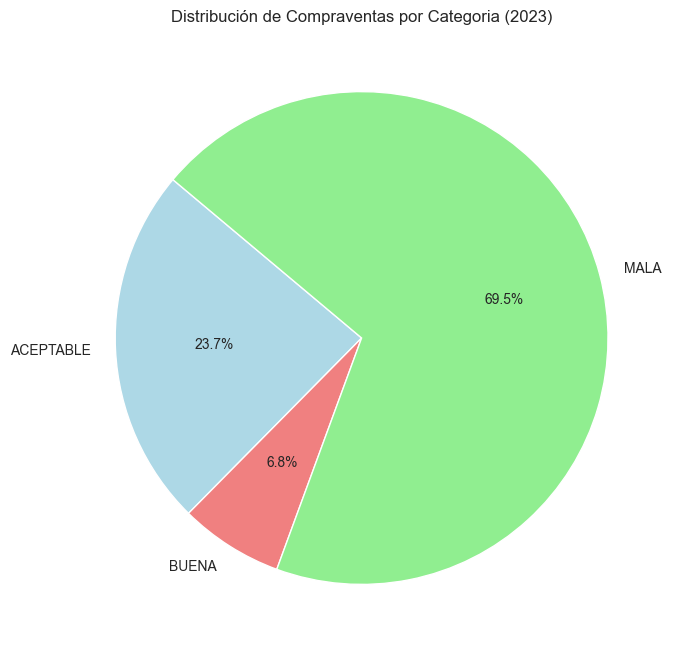

In [124]:
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df_filtrado = df_merged[(df_merged['AÑO'] >= 2023) & (df_merged['AÑO'] <= 2023)]

# Agrupa los datos por la columna 'Etiqueta' y calcula la suma de 'Compraventas' para cada etiqueta en el período filtrado
suma_por_etiqueta = df_filtrado.groupby('Etiqueta')['Compraventas'].sum()

# Etiquetas para las secciones del gráfico de quesos
etiquetas = suma_por_etiqueta.index

# Valores correspondientes a las sumas de 'Compraventas'
valores = suma_por_etiqueta.values
colores = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon']

# Crear el gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)

# Título del gráfico con el rango de años
plt.title("Distribución de Compraventas por Categoria (2023)")

# Mostrar el gráfico
plt.show()


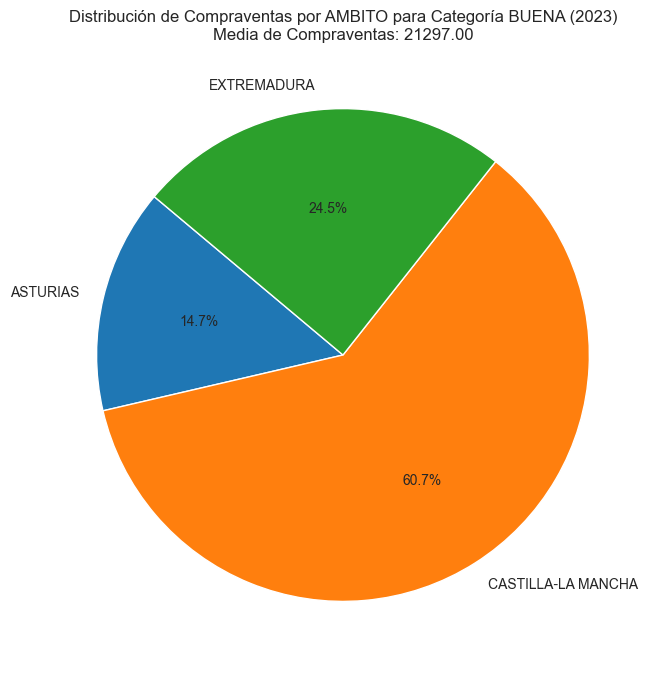

In [125]:
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df_filtrado = df_merged[(df_merged['AÑO'] >= 2023) & (df_merged['AÑO'] <= 2023)]

df_seleccionado = df_filtrado[df_filtrado['Etiqueta'] == 'BUENA']

# Agrupa los datos por la columna 'Etiqueta' y calcula la suma de 'Compraventas' para cada etiqueta
suma_por_etiqueta = df_seleccionado.groupby('AMBITO')['Compraventas'].sum()

# Etiquetas para las secciones del gráfico de quesos
etiquetas = suma_por_etiqueta.index

# Valores correspondientes a las sumas de 'Compraventas'
valores = suma_por_etiqueta.values

# Calcular la media de las sumas de 'Compraventas' en el período
media_compraventas = valores.sum() / len(df_filtrado['AÑO'].unique())

# Crear el gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)

# Título del gráfico con la media de compraventas
plt.title(f"Distribución de Compraventas por AMBITO para Categoría BUENA (2023)\nMedia de Compraventas: {media_compraventas:.2f}")

# Mostrar el gráfico
plt.show()

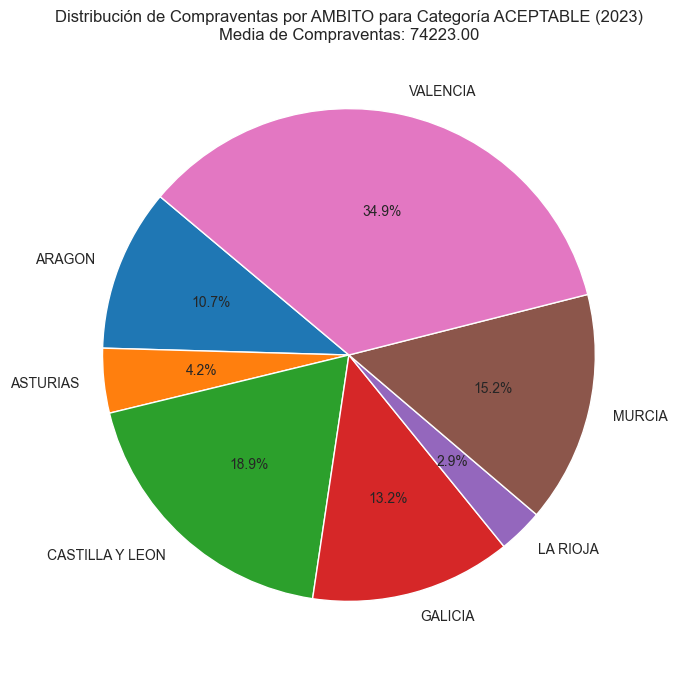

In [126]:
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df_filtrado = df_merged[(df_merged['AÑO'] >= 2023) & (df_merged['AÑO'] <= 2023)]

df_seleccionado = df_filtrado[df_filtrado['Etiqueta'] == 'ACEPTABLE']

# Agrupa los datos por la columna 'Etiqueta' y calcula la suma de 'Compraventas' para cada etiqueta
suma_por_etiqueta = df_seleccionado.groupby('AMBITO')['Compraventas'].sum()

# Etiquetas para las secciones del gráfico de quesos
etiquetas = suma_por_etiqueta.index

# Valores correspondientes a las sumas de 'Compraventas'
valores = suma_por_etiqueta.values

# Calcular la media de las sumas de 'Compraventas' en el período
media_compraventas = valores.sum() / len(df_filtrado['AÑO'].unique())

# Crear el gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)

# Título del gráfico con la media de compraventas
plt.title(f"Distribución de Compraventas por AMBITO para Categoría ACEPTABLE (2023)\nMedia de Compraventas: {media_compraventas:.2f}")

# Mostrar el gráfico
plt.show()

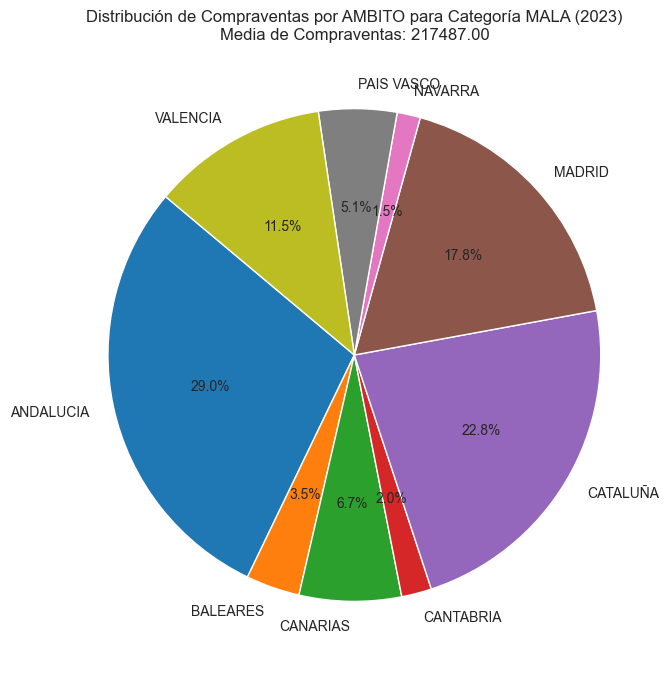

In [127]:
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df_filtrado = df_merged[(df_merged['AÑO'] >= 2023) & (df_merged['AÑO'] <= 2023)]

df_seleccionado = df_filtrado[df_filtrado['Etiqueta'] == 'MALA']

# Agrupa los datos por la columna 'Etiqueta' y calcula la suma de 'Compraventas' para cada etiqueta
suma_por_etiqueta = df_seleccionado.groupby('AMBITO')['Compraventas'].sum()

# Etiquetas para las secciones del gráfico de quesos
etiquetas = suma_por_etiqueta.index

# Valores correspondientes a las sumas de 'Compraventas'
valores = suma_por_etiqueta.values

# Calcular la media de las sumas de 'Compraventas' en el período
media_compraventas = valores.sum() / len(df_filtrado['AÑO'].unique())

# Crear el gráfico de quesos
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)

# Título del gráfico con la media de compraventas
plt.title(f"Distribución de Compraventas por AMBITO para Categoría MALA (2023)\nMedia de Compraventas: {media_compraventas:.2f}")

# Mostrar el gráfico
plt.show()

---


INCISO 2: Buscamos también la evolución del mercado en los últimos 10 años, respecto a tipo de viviendas:

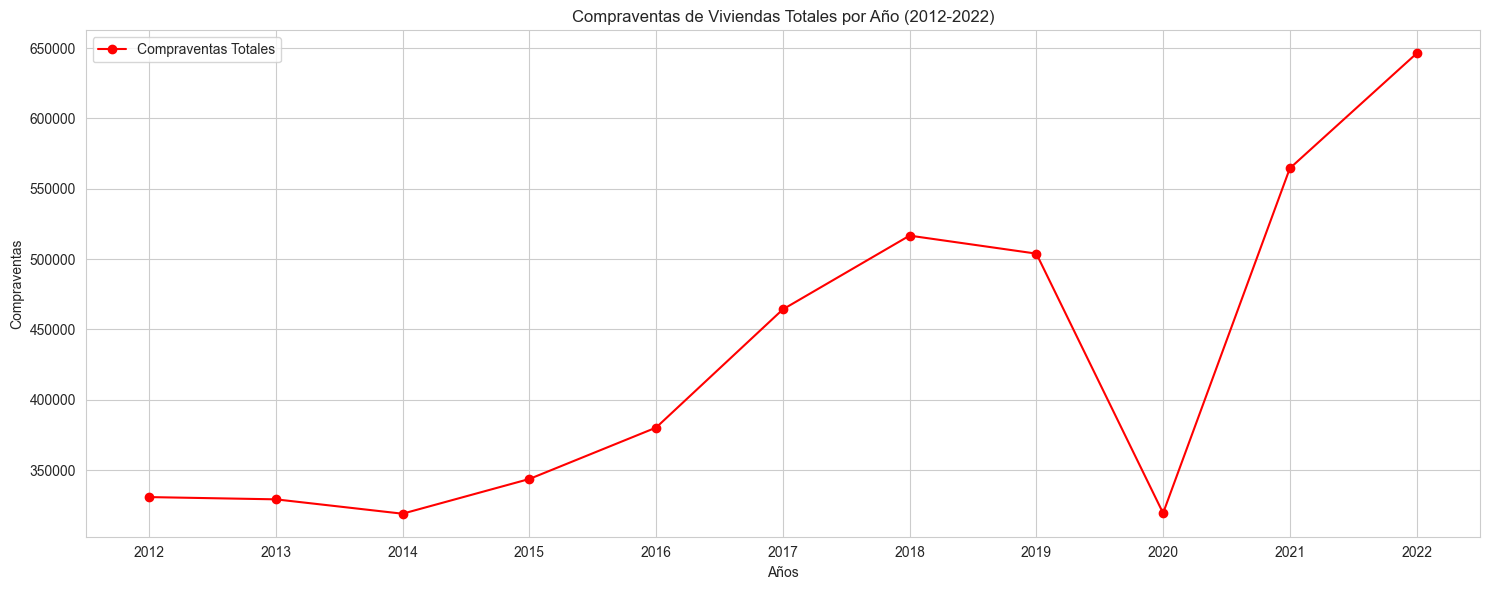

In [178]:
# Define el rango de años que deseas seleccionar
start_year = 2012
end_year = 2022

# Filtra el DataFrame para incluir solo los datos dentro del rango de años
filtered_df = df_merged[(df_merged["AÑO"] >= start_year) & (df_merged["AÑO"] <= end_year)]

# Ordena el DataFrame por año
filtered_df = filtered_df.sort_values(by="AÑO")

# Datos del DataFrame filtrado
anos = filtered_df["AÑO"].unique()
compraventas_totales = filtered_df.groupby("AÑO")["Compraventas"].sum()

# Posiciones en el eje X
x = np.arange(len(anos))

# Crear un gráfico de líneas para compraventas totales
plt.figure(figsize=(15, 6))  # Tamaño del gráfico

plt.plot(x, compraventas_totales, marker='o', color='red', label='Compraventas Totales')

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Compraventas')
plt.title(f'Compraventas de Viviendas Totales por Año ({start_year}-{end_year})')
plt.xticks(x, anos)  # Etiquetas en el eje X

plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

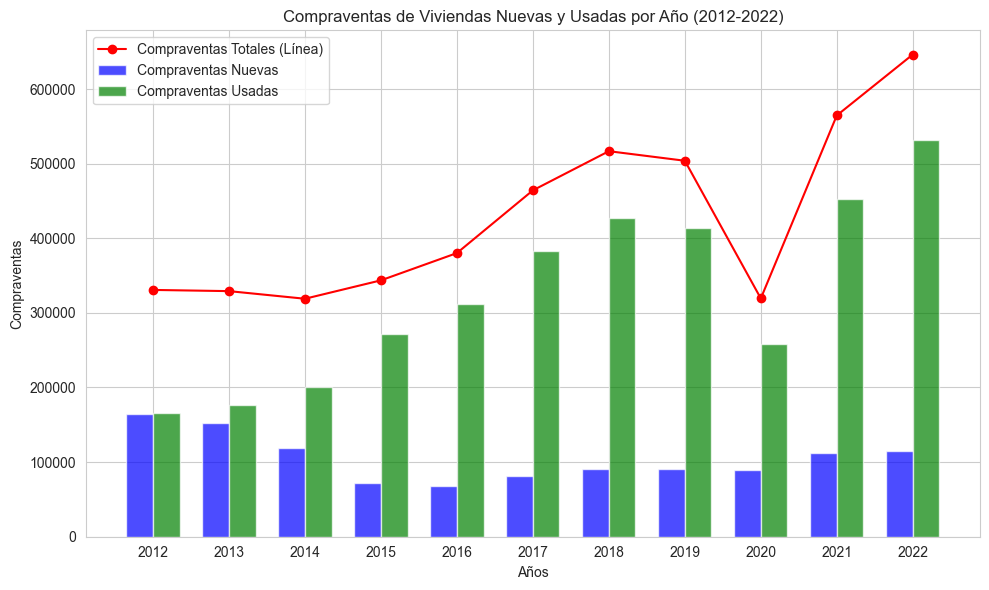

In [128]:

# Define el rango de años que deseas seleccionar
start_year = 2012
end_year = 2022

# Filtra el DataFrame para incluir solo los datos dentro del rango de años
filtered_df = df_merged[(df_merged["AÑO"] >= start_year) & (df_merged["AÑO"] <= end_year)]

# Ordena el DataFrame por año
filtered_df = filtered_df.sort_values(by="AÑO")

# Datos del DataFrame filtrado
anos = filtered_df["AÑO"].unique()
compraventas_nuevas = filtered_df.groupby("AÑO")["Comprav_nueva"].sum()
compraventas_usadas = filtered_df.groupby("AÑO")["Comprav_usada"].sum()
compraventas_totales = filtered_df.groupby("AÑO")["Compraventas"].sum()

# Posiciones en el eje X
x = np.arange(len(anos))

# Ancho de las barras
ancho = 0.35

# Crear un gráfico de barras con barras separadas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

plt.bar(x - ancho/2, compraventas_nuevas, width=ancho, label='Compraventas Nuevas', color='blue', alpha=0.7)
plt.bar(x + ancho/2, compraventas_usadas, width=ancho, label='Compraventas Usadas', color='green', alpha=0.7)

# Gráfico de líneas para compraventas totales
plt.plot(x, compraventas_totales, marker='o', color='red', label='Compraventas Totales (Línea)')

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Compraventas')
plt.title(f'Compraventas de Viviendas Nuevas y Usadas por Año ({start_year}-{end_year})')
plt.xticks(x, anos)  # Etiquetas en el eje X

plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

INCISO 3: Visualizamos también evolucion de precios medios anuales por tipo de vivienda:

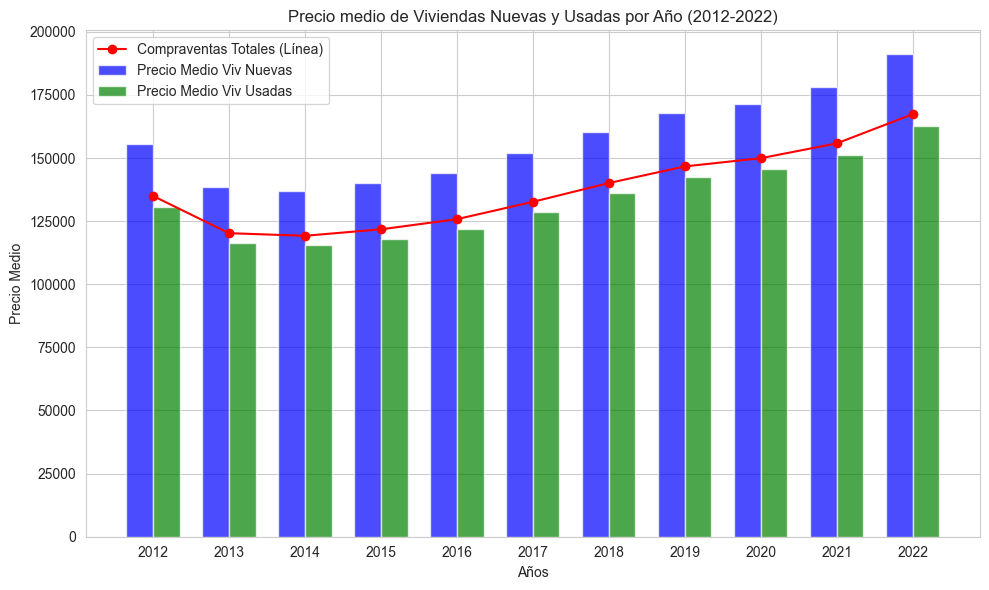

In [176]:

# Define el rango de años que deseas seleccionar
start_year = 2012
end_year = 2022

# Filtra el DataFrame para incluir solo los datos dentro del rango de años
filtered_df = df_merged[(df_merged["AÑO"] >= start_year) & (df_merged["AÑO"] <= end_year)]

# Ordena el DataFrame por año
filtered_df = filtered_df.sort_values(by="AÑO")

# Datos del DataFrame filtrado
anos = filtered_df["AÑO"].unique()
compraventas_nuevas = filtered_df.groupby("AÑO")["Precio_nueva"].mean()
compraventas_usadas = filtered_df.groupby("AÑO")["Precio_usada"].mean()
compraventas_totales = filtered_df.groupby("AÑO")["Precio"].mean()

# Posiciones en el eje X
x = np.arange(len(anos))

# Ancho de las barras
ancho = 0.35

# Crear un gráfico de barras con barras separadas
plt.figure(figsize=(10, 6))  # Tamaño del gráfico

plt.bar(x - ancho/2, compraventas_nuevas, width=ancho, label='Precio Medio Viv Nuevas', color='blue', alpha=0.7)
plt.bar(x + ancho/2, compraventas_usadas, width=ancho, label='Precio Medio Viv Usadas', color='green', alpha=0.7)

# Gráfico de líneas para compraventas totales
plt.plot(x, compraventas_totales, marker='o', color='red', label='Compraventas Totales (Línea)')

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Precio Medio')
plt.title(f'Precio medio de Viviendas Nuevas y Usadas por Año ({start_year}-{end_year})')
plt.xticks(x, anos)  # Etiquetas en el eje X

plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

---

##### REALIZADAS DICHAS COMPROBACIONES Y UNA VEZ HEMOS OBTENIDO LA CATEGORIZACION DE QUE RELACIONA VARIABLES ECONOMICO-FINANCIERAS CON LAS DE DEMANDA Y OFERTA, PROCEDEMOS CON EL ANALIS: 

ANÁLISIS DEL DATASET OBJETIVO

In [129]:
df_merged.shape

(776, 14)

Balanceo del dataset: 

In [130]:
df_merged['Etiqueta'].value_counts()

Etiqueta
BUENA        357
ACEPTABLE    215
MALA         204
Name: count, dtype: int64

Se observa que en la categoria que hemos creado los datos no están balanceados, pero ello se corresponde con la realidad, en cuanto a que existe un problema real a nivel, para la adquisicion de vivienda libre, y se evidencia en la numerosa cuantia de comunidades categorizadas con MALA capacidad de compra.

### Info. general del dataset

In [131]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AÑO            776 non-null    int64  
 1   TRIMESTRE      776 non-null    object 
 2   AMBITO         776 non-null    object 
 3   Precio         776 non-null    float64
 4   Precio_nueva   776 non-null    float64
 5   Precio_usada   776 non-null    float64
 6   Compraventas   776 non-null    float64
 7   Comprav_nueva  776 non-null    float64
 8   Comprav_usada  776 non-null    float64
 9   Interes        776 non-null    float64
 10  Plazo          776 non-null    float64
 11  Salario        776 non-null    float64
 12  Cuota_ptm      776 non-null    float64
 13  Etiqueta       776 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 85.0+ KB


Estos dataframes se utilizarán en el analisis multivariado

In [132]:
df=df_merged # para simplificar la programación la coipo a variable más corta y standar
filt = (df['Etiqueta'] == 'BUENA')
df_ACEPTABLE = df.loc[filt]
filt = (df['Etiqueta'] == 'ACEPTABLE')
df_BUENA = df.loc[filt]
filt = (df['Etiqueta'] == 'MALA')
df_MALA = df.loc[filt]

## 2- ANALISIS UNIVARIADO

### 2.1 Precio

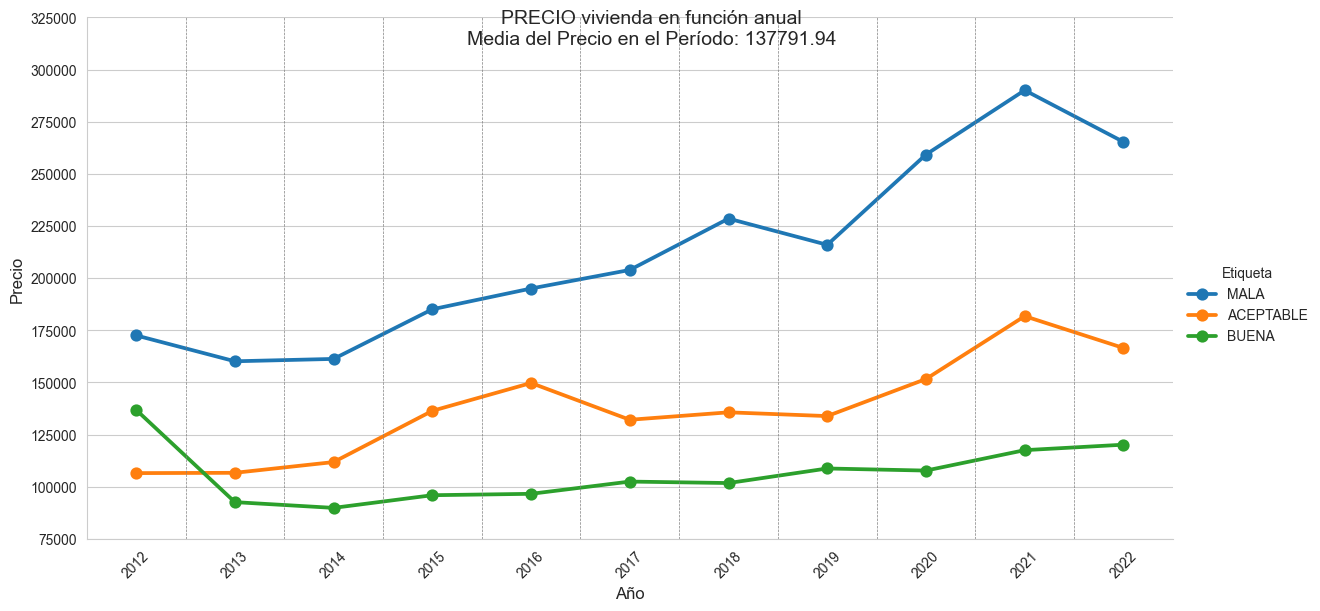

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2010) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Precio'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AÑO",
                y="Precio",
                hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Agregar líneas verticales grises entre las columnas
num_categorias = len(df['AÑO'].unique())
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=45, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"PRECIO vivienda en función anual\nMedia del Precio en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Precio", fontsize=12)

plt.show()

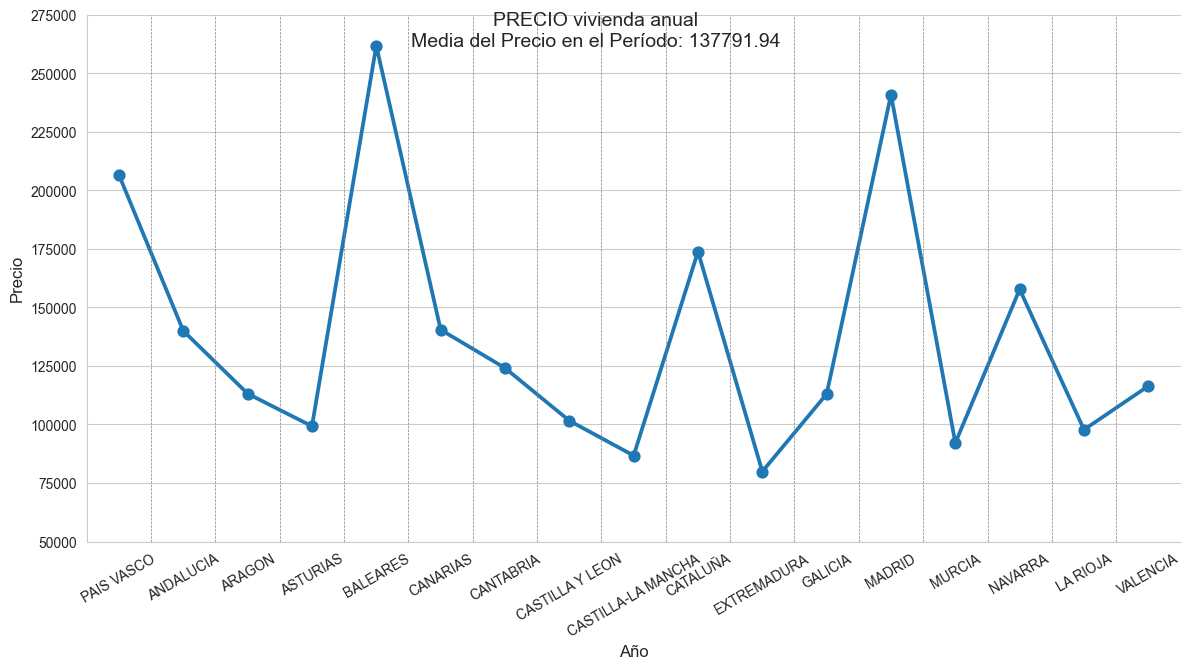

In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Precio'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AMBITO",
                y="Precio",
                # hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Calcular la cantidad de categorías en el eje x
num_categorias = len(df['AMBITO'].unique())

# Calcular la posición del centro de cada columna
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]

# Añadir líneas verticales grises en el centro de cada columna
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"PRECIO vivienda anual\nMedia del Precio en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Precio", fontsize=12)

plt.show()

VARIABLE PRECIO: En las comunidades donde hay peor Capacidad de Compra, son aquellaas en las que la vivienda es más cara.

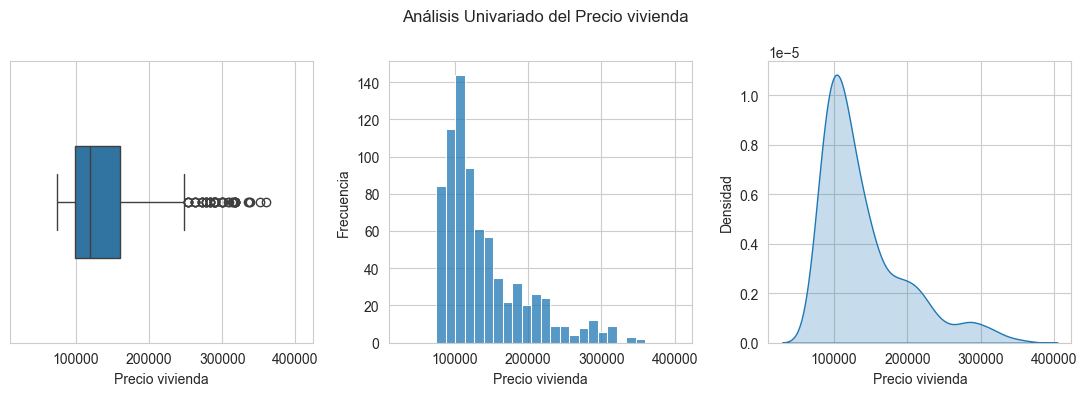

In [136]:
var = 'Precio'
var_title = 'Precio vivienda'
df =df_merged
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado del ' + var_title)

plt.tight_layout()

VARIABLE PRECIO: Las viviendas de precio más bajo son las numerosas, con una media en los ultimos 10 años, que se mueve en el entorno de los 138.000 euros. Esta cifra se eleva en el 2012 (último año completo), a los 160.000 euros a nivel nacional, correspondiendo 184.000 euros a la viv. Nueva y 155.000 a la usada.

### 2.2 Salario

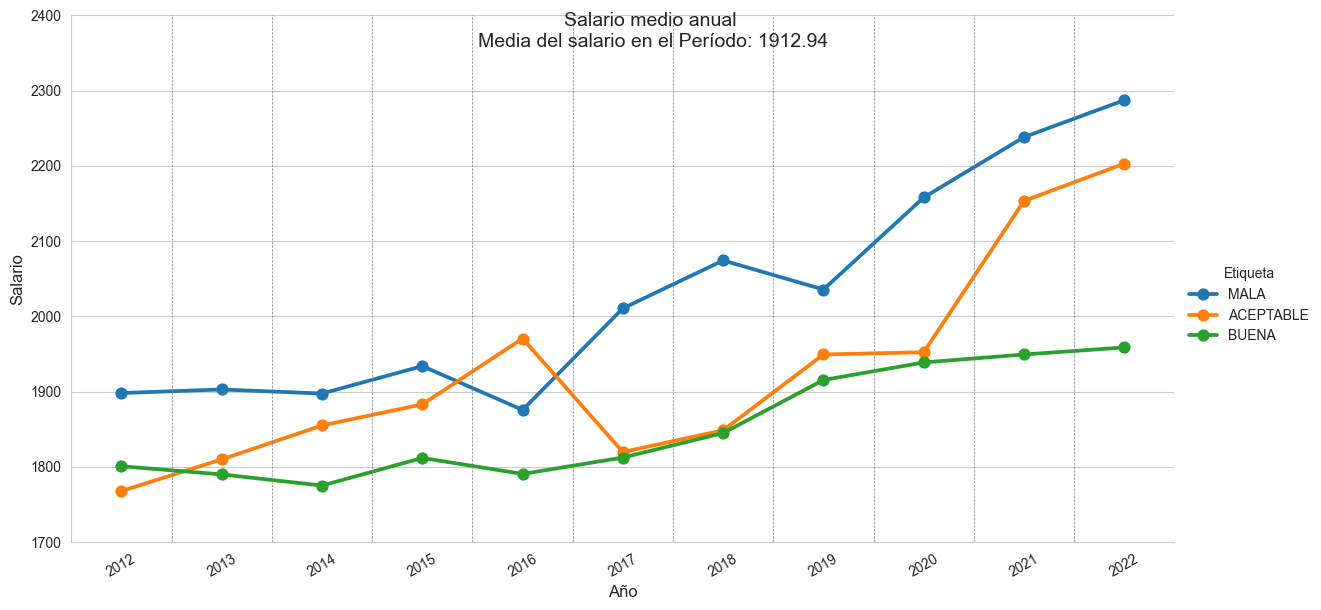

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_param_periodo = df['Salario'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AÑO",
                y="Salario",
                hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Agregar líneas verticales grises entre las columnas
num_categorias = len(df['AÑO'].unique())
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"Salario medio anual \nMedia del salario en el Período: {media_param_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Salario", fontsize=12)

plt.show()

SALARIO: El rango de salarios es más alto en las categorias con peor capacidad de compra y más bajo en las de capacidad de compra buena.


POR COMUNIDADES:

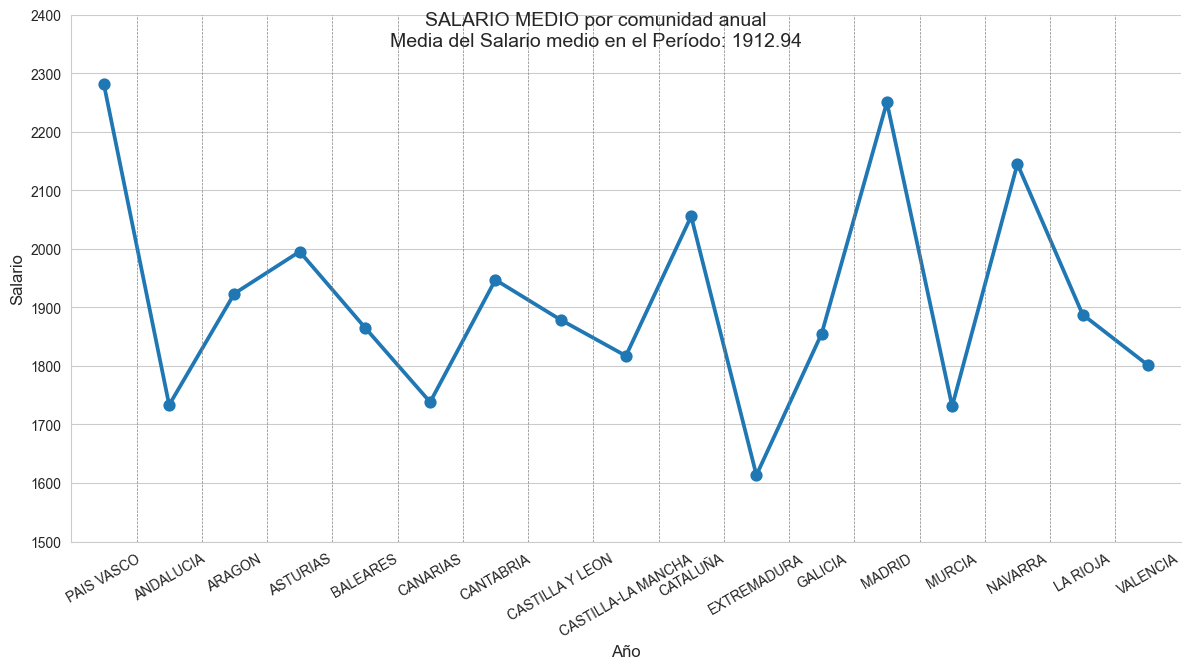

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Salario'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AMBITO",
                y="Salario",
                # hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
# sns.set_style("whitegrid")

# Calcular la cantidad de categorías en el eje x
num_categorias = len(df['AMBITO'].unique())

# Calcular la posición del centro de cada columna
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]

# Añadir líneas verticales grises en el centro de cada columna
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"SALARIO MEDIO por comunidad anual\nMedia del Salario medio en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Salario", fontsize=12)

plt.show()

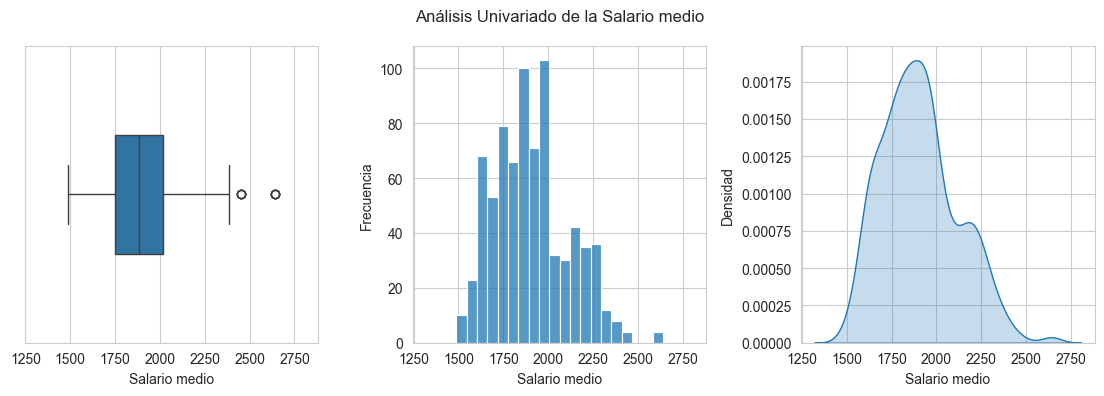

In [139]:
df =df_merged
var = 'Salario'
var_title = 'Salario medio'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 2.3 Cuotas Hipotecarias:

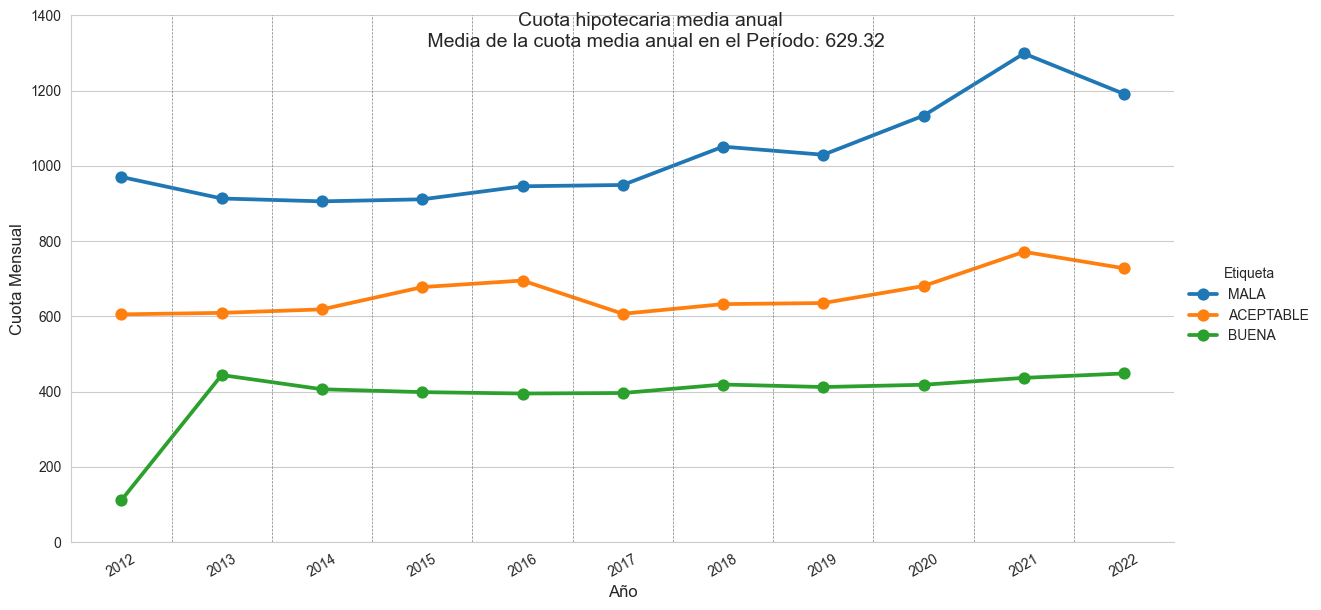

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_param_periodo = df['Cuota_ptm'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AÑO",
                y="Cuota_ptm",
                hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Agregar líneas verticales grises entre las columnas
num_categorias = len(df['AÑO'].unique())
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"Cuota hipotecaria media anual \n Media de la cuota media anual en el Período: {media_param_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Cuota Mensual", fontsize=12)

plt.show()

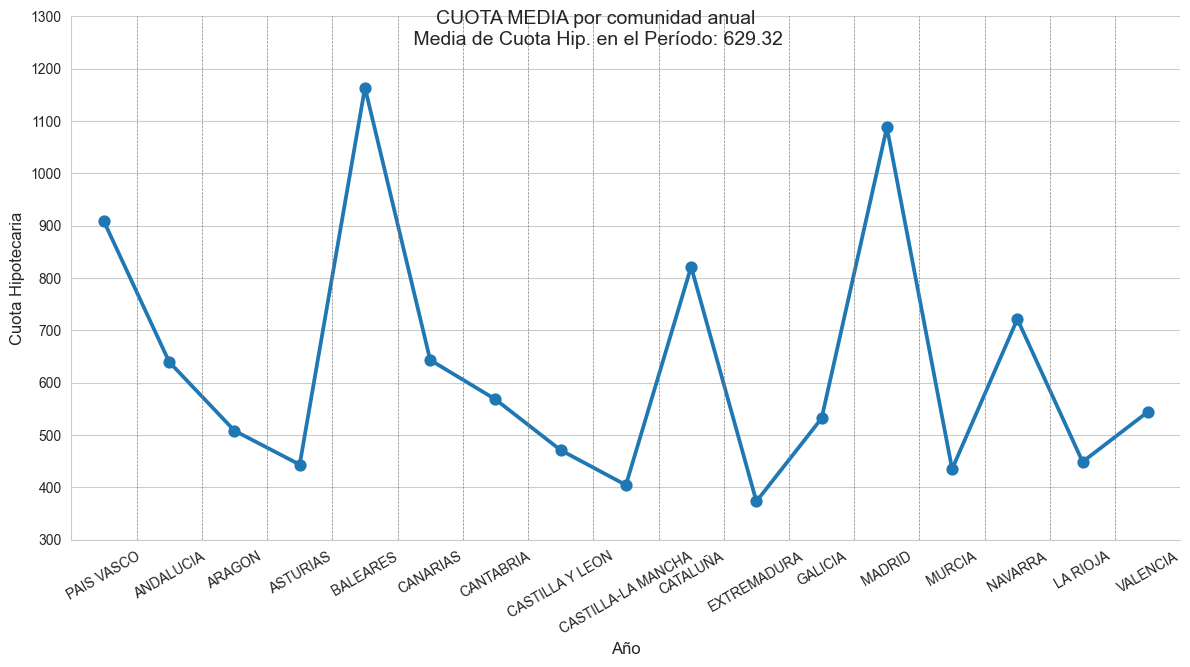

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Cuota_ptm'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AMBITO",
                y="Cuota_ptm",
                # hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
# sns.set_style("whitegrid")

# Calcular la cantidad de categorías en el eje x
num_categorias = len(df['AMBITO'].unique())

# Calcular la posición del centro de cada columna
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]

# Añadir líneas verticales grises en el centro de cada columna
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"CUOTA MEDIA por comunidad anual\n Media de Cuota Hip. en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Cuota Hipotecaria", fontsize=12)

plt.show()

CUOTA HIPOTECARIA: Las cuotas resultan más elevadas, en las comunidades con peor capacidad de compra. 

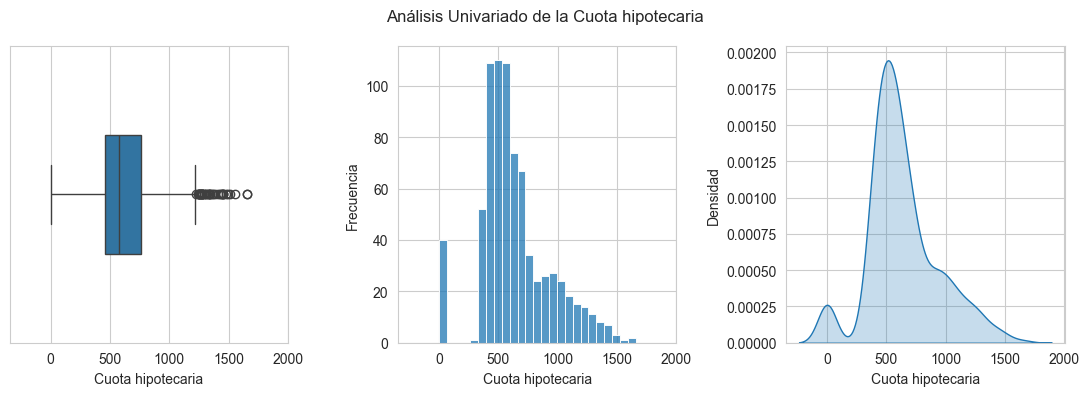

In [142]:
df =df_merged
var = 'Cuota_ptm'
var_title = 'Cuota hipotecaria'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 2.4 Número de Compraventas

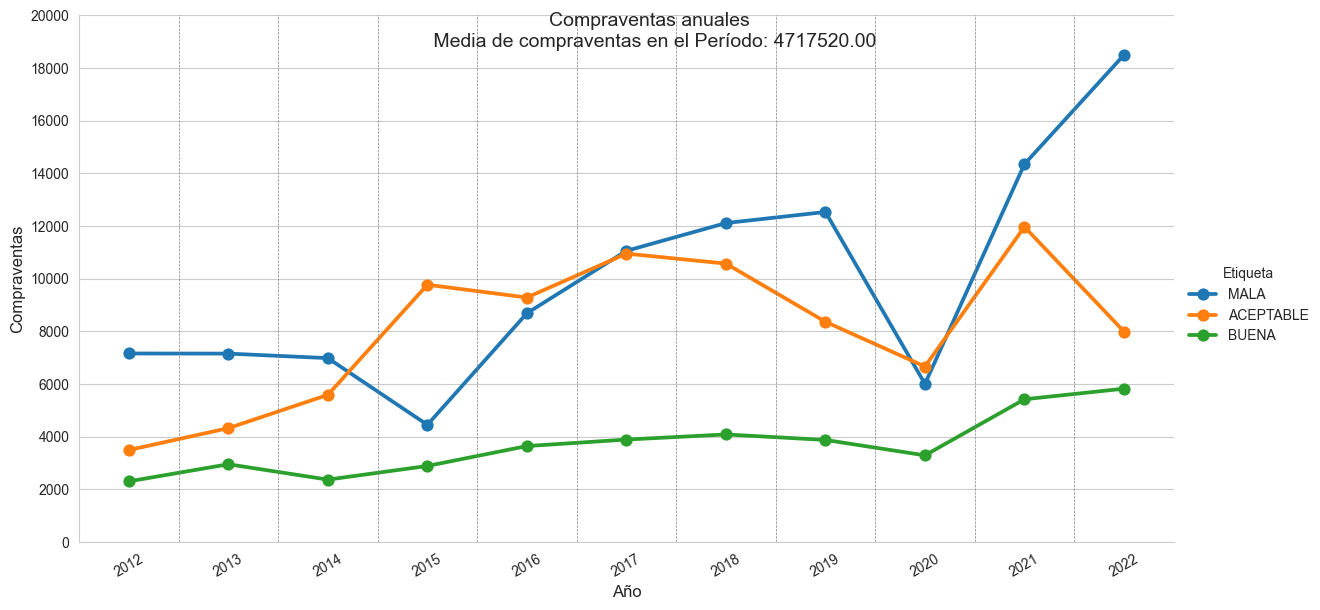

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_param_periodo = df['Compraventas'].sum()

# Crear el gráfico de barras
g = sns.catplot(x="AÑO",
                y="Compraventas",
                hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Agregar líneas verticales grises entre las columnas
num_categorias = len(df['AÑO'].unique())
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"Compraventas anuales \n Media de compraventas en el Período: {media_param_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Compraventas", fontsize=12)

plt.show()

COMPRAVENTAS: Se ha producido un incremento de ventas en los últimos diez años, que casi duplica los valores del 2012. Se producen más ventas en  las CCAA con pero capacidad de compra.

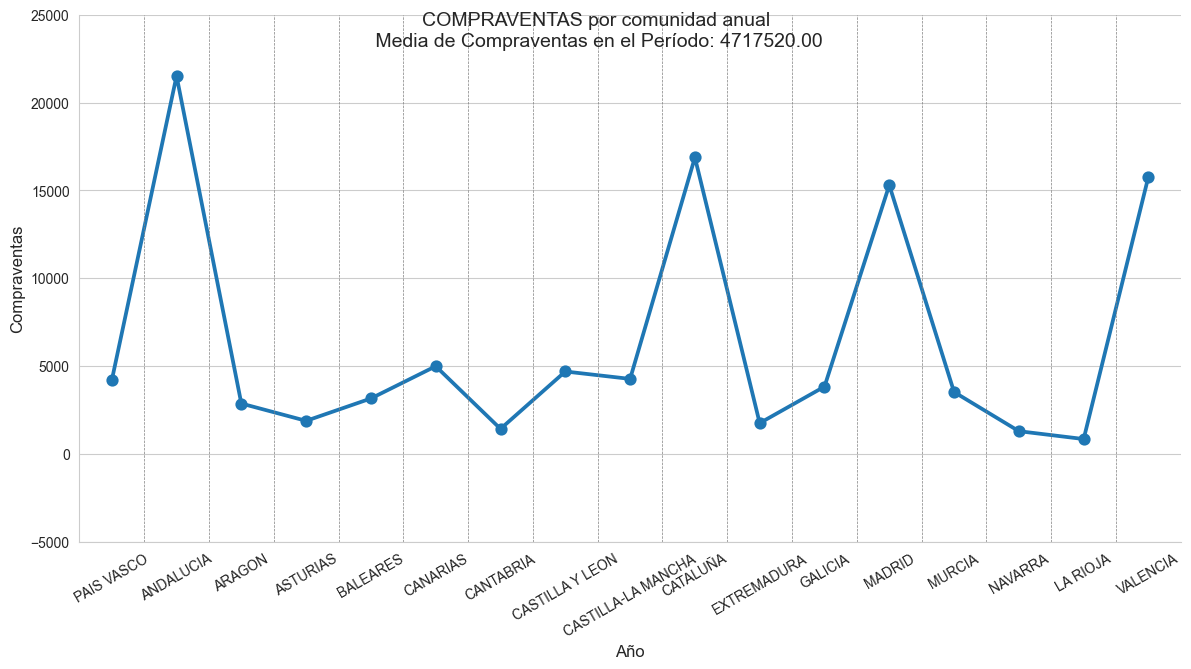

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Compraventas'].sum()

# Crear el gráfico de barras
g = sns.catplot(x="AMBITO",
                y="Compraventas",
                # hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
# sns.set_style("whitegrid")

# Calcular la cantidad de categorías en el eje x
num_categorias = len(df['AMBITO'].unique())

# Calcular la posición del centro de cada columna
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]

# Añadir líneas verticales grises en el centro de cada columna
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"COMPRAVENTAS por comunidad anual\n Media de Compraventas en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Compraventas", fontsize=12)

plt.show()

COMPRAVENTAS: La media anual en este periodo resulta en 471.000 ventas año, correspondiendo el 25% a viv. Nueva y el resto de segunda mano.

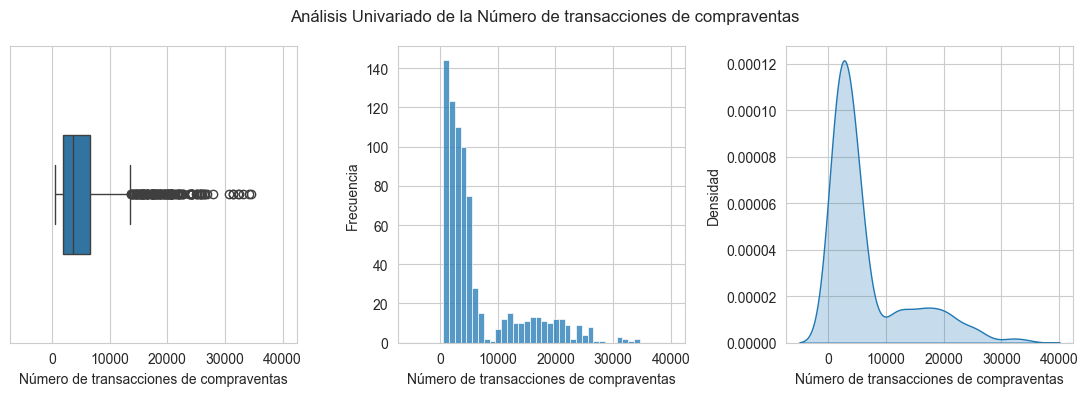

In [145]:
df =df_merged
var = 'Compraventas'
var_title = 'Número de transacciones de compraventas'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

### 2.5 Tipo de Interés

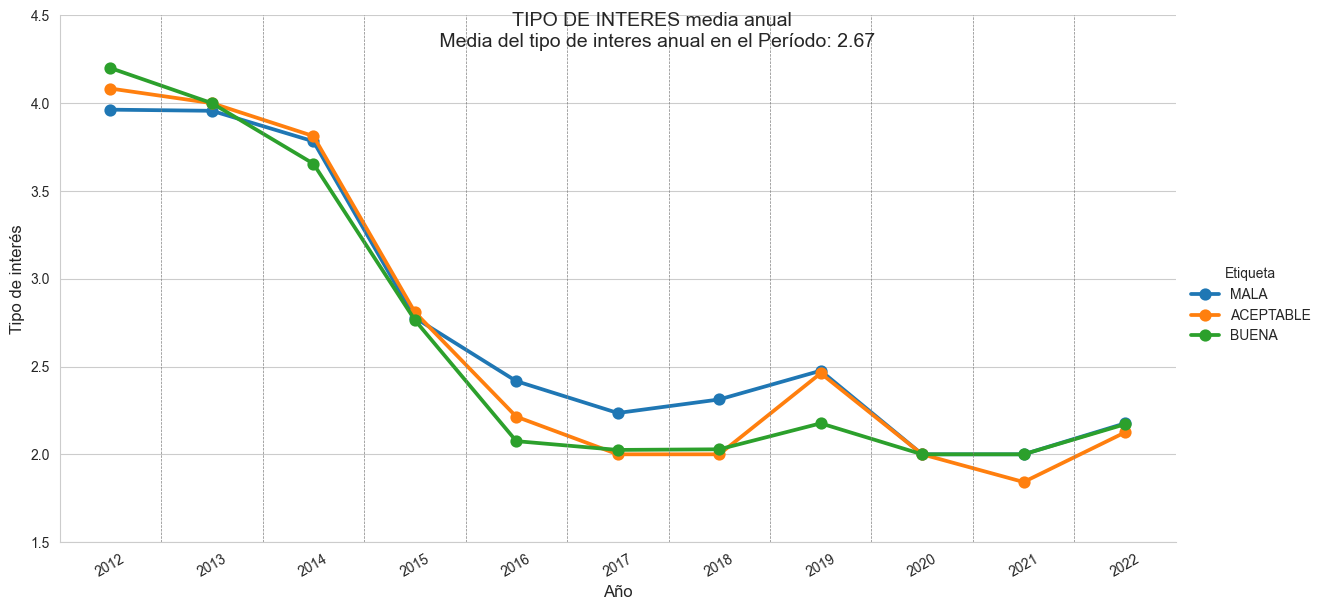

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_param_periodo = df['Interes'].mean()

# Crear el gráfico de barras
g = sns.catplot(x="AÑO",
                y="Interes",
                hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico
sns.set_style("whitegrid")

# Agregar líneas verticales grises entre las columnas
num_categorias = len(df['AÑO'].unique())
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"TIPO DE INTERES media anual \n Media del tipo de interes anual en el Período: {media_param_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Tipo de interés", fontsize=12)

plt.show()

TIPO DE INTERES: La intervencion del banco central europeo en el 2014-2015, resultó crucial para mitigar los efectos de la post-crisis del sector, reduciendo los mismos, para incentivar el crecimiento pais.

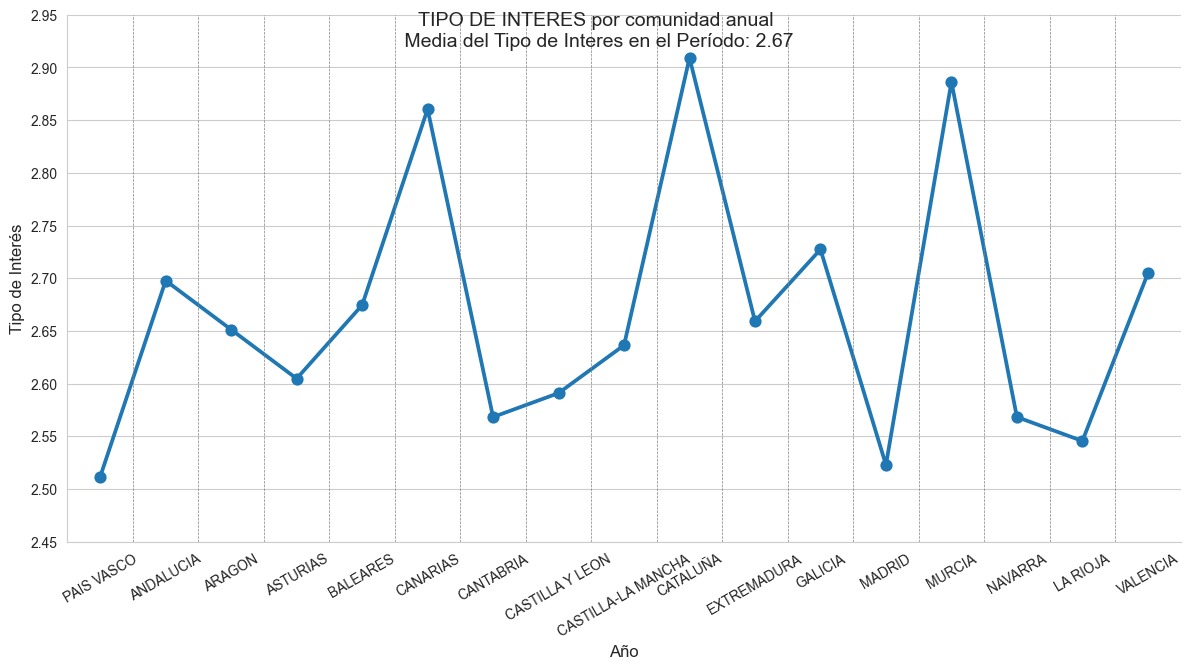

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2010 a 2020)
df = df_merged[(df_merged['AÑO'] >= 2012) & (df_merged['AÑO'] <= 2022)]

# Calcular la media de los precios en el período
media_precio_periodo = df['Interes'].mean()

# sns.set_style("whitegrid")

# Crear el gráfico de barras
g = sns.catplot(x="AMBITO",
                y="Interes",
                # hue="Etiqueta",
                kind="point",
                data=df,
                errorbar=None,
                height=6, aspect=2)  # Ajustar el tamaño del gráfico


# Calcular la cantidad de categorías en el eje x
num_categorias = len(df['AMBITO'].unique())

# Calcular la posición del centro de cada columna
posiciones = [(i + 0.5) for i in range(num_categorias - 1)]

# Añadir líneas verticales grises en el centro de cada columna
for posicion in posiciones:
    plt.axvline(x=posicion, color='gray', linestyle='--', linewidth=0.5)

# Modificar el tamaño del texto en el eje x (año)
g.set_xticklabels(rotation=30, fontsize=10)  # Cambiar el tamaño del texto en el eje x y rotar las etiquetas si es necesario

# Modificar el tamaño del texto en el eje y (cuota mensual)
g.set_yticklabels(fontsize=10)  # Cambiar el tamaño del texto en el eje y

# Personalizar el título y el tamaño del texto del título
g.fig.suptitle(f"TIPO DE INTERES por comunidad anual\n Media del Tipo de Interes en el Período: {media_precio_periodo:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
g.set_axis_labels("Año", "Tipo de Interés", fontsize=12)

plt.show()

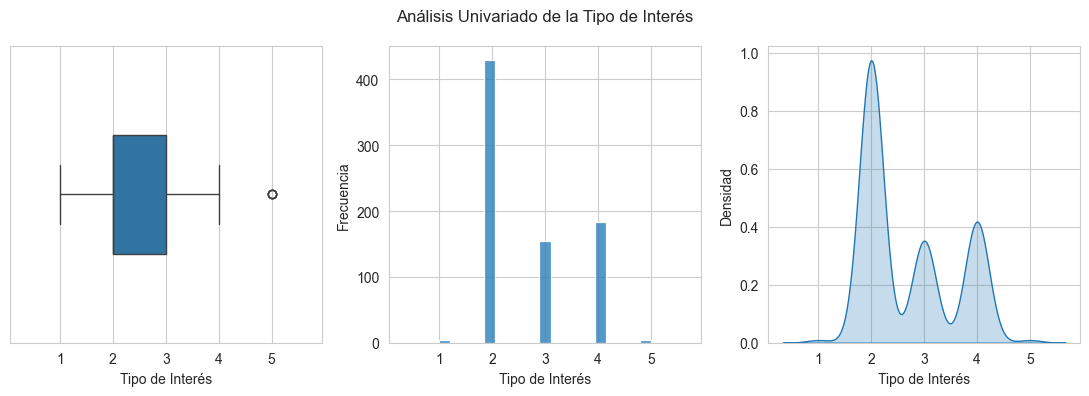

In [149]:
df =df_merged
var = 'Interes'
var_title = 'Tipo de Interés'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

TIPOS DE INTERES: En el periodo analizado se han producido tres modas desscendentes, que pasan desde el 4,1% del 2012, al 2,20 del 2022, lo que arroja una media de 2.74%.

### 2.6 PIB - Producto Interior Bruto

Recojo esta variable, de forma símbolica, en el sentido de que este dato se facilita a nivel País y de forma anual, por lo que el número de registros es mínimo, y el resultado de su grafica, poco nos aporta. 

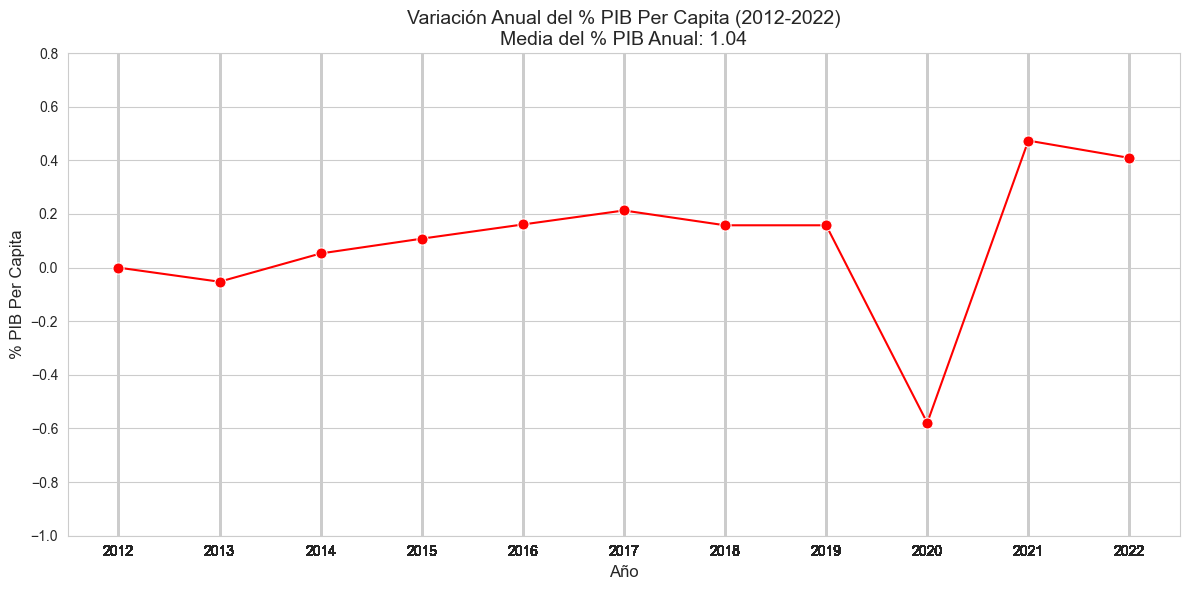

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las filas en el DataFrame original dentro del rango de años deseado (por ejemplo, de 2012 a 2022)
df = df_1[(df_1['AÑO'] >= 2012) & (df_1['AÑO'] <= 2022)]

# Calcular la media de los valores en la columna "VAR ANUAL PER CAPITA" en el período
media_var_anual_1 = df['VAR ANUAL PER CAPITA']*10
media_var_anual = media_var_anual_1.mean()

# Establecer el estilo de Seaborn
sns.set_style("whitegrid", {"axes.labelweight": "normal", "grid.linewidth": 0.5, "font.sans-serif": ["Arial"]})

# Crear el gráfico de líneas con la línea de color rojo
plt.figure(figsize=(12, 6))

g = sns.lineplot(x="AÑO", y="VAR ANUAL PER CAPITA", data=df, marker="o", markersize=8, err_style="bars", errorbar=None, color="red")

# Configurar los ticks en el eje x para mostrar todos los años
plt.xticks(df['AÑO'], rotation=0, fontsize=10, fontweight="normal")

# Establecer los límites del eje y
plt.ylim(-1, 0.8)

# Personalizar el título y el tamaño del texto del título
plt.title(f"Variación Anual del % PIB Per Capita (2012-2022)\nMedia del % PIB Anual: {media_var_anual:.2f}", fontsize=14)

# Personalizar los nombres de los ejes x e y y el tamaño del texto de los ejes
plt.xlabel("Año", fontsize=12)
plt.ylabel("% PIB Per Capita", fontsize=12)

plt.tight_layout()

plt.show()

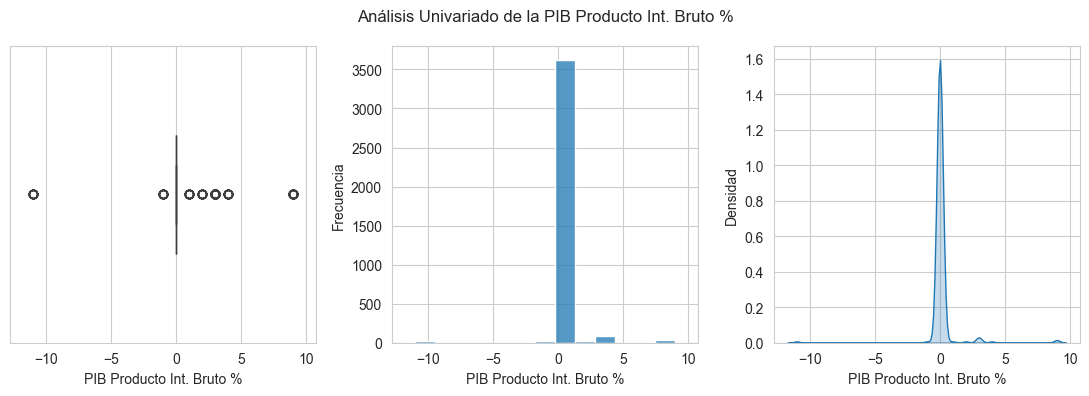

In [151]:
df =df_1
var = 'VAR ANUAL PER CAPITA'
var_title = 'PIB Producto Int. Bruto %'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
sns.set_style("whitegrid")
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

PIB: Media del periodo en el entorno del 2%, con un crecimiento pais que pasa del -0,90% en el 2012, al 9,20% del año 2022.

## 3. ANALISIS MULTIVARIADO


### 3.1 PRECIO VS CATEGORIA DE ACCESO A VIVIENDA (es decir ETIQUETA)

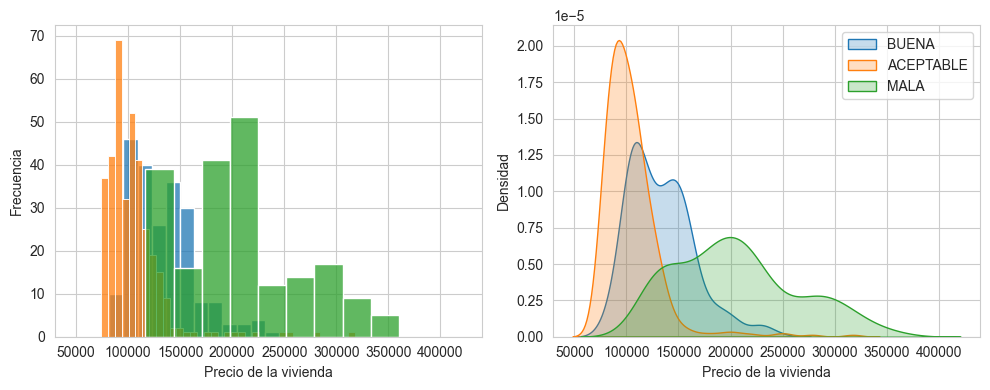

In [152]:
var = 'Precio'
var_title = 'Precio de la vivienda'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_BUENA, x=var, label="BUENA", kde=False, ax=ax[0])
sns.histplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", kde=False, ax=ax[0])
sns.histplot(data=df_MALA, x=var, label="MALA", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_BUENA, x=var, label="BUENA", fill=True, ax=ax[1])
sns.kdeplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", fill=True, ax=ax[1])
sns.kdeplot(data=df_MALA, x=var, label="MALA", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

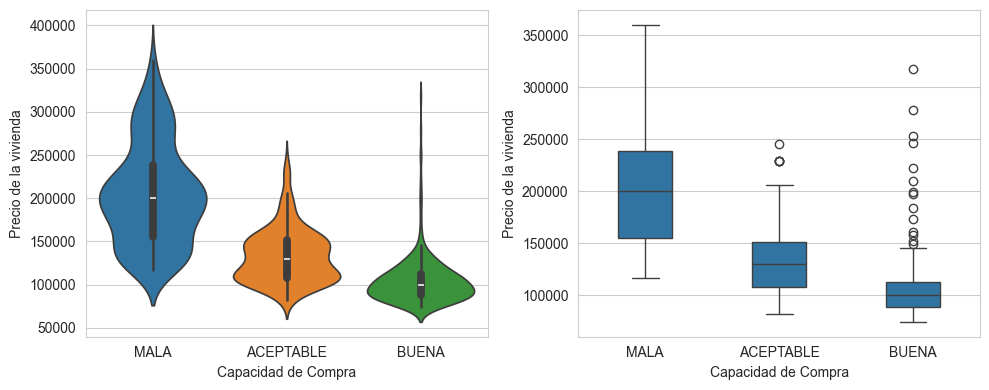

In [153]:
df=df_merged
var = 'Precio'
var_title = 'Precio de la vivienda'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='Etiqueta', y=var, ax=ax[0], hue='Etiqueta')
ax[0].set_xlabel('Capacidad de Compra')
ax[0].set_ylabel(var_title)
# ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='Etiqueta', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Capacidad de Compra')
ax[1].set_ylabel(var_title)

plt.tight_layout()

### 3.2 SALARIO VS CATEGORIA DE ACCESO A VIVIENDA

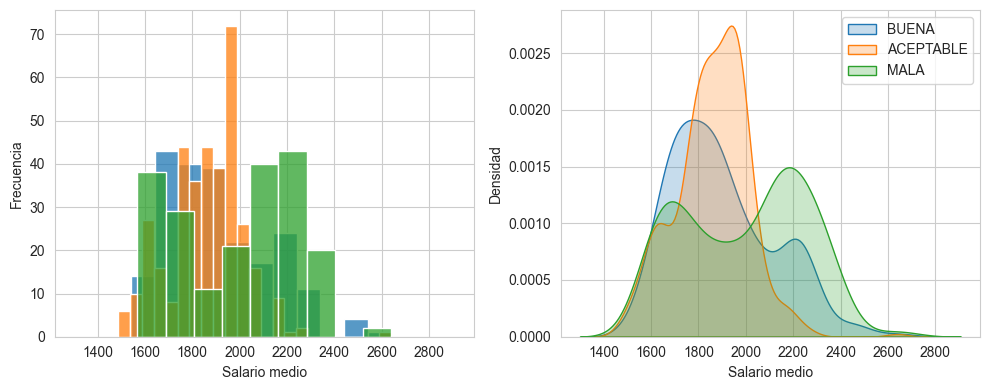

In [154]:
df=df_merged
var = 'Salario'
var_title = 'Salario medio'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_BUENA, x=var, label="BUENA", kde=False, ax=ax[0])
sns.histplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", kde=False, ax=ax[0])
sns.histplot(data=df_MALA, x=var, label="MALA", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_BUENA, x=var, label="BUENA", fill=True, ax=ax[1])
sns.kdeplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", fill=True, ax=ax[1])
sns.kdeplot(data=df_MALA, x=var, label="MALA", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

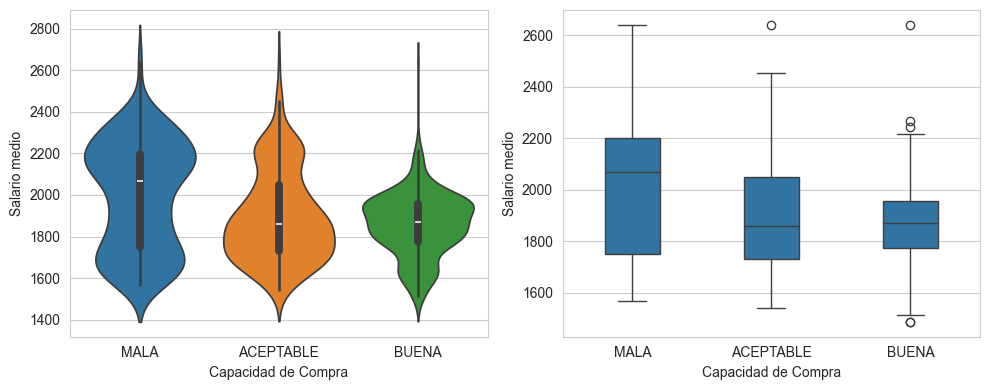

In [155]:
df=df_merged
var = 'Salario'
var_title = 'Salario medio'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='Etiqueta', y=var, ax=ax[0], hue='Etiqueta')
ax[0].set_xlabel('Capacidad de Compra')
ax[0].set_ylabel(var_title)
# ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='Etiqueta', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Capacidad de Compra')
ax[1].set_ylabel(var_title)

plt.tight_layout()

### 3.3 CUOTAS VS CATEGORIA DE ACCESO A VIVIENDA

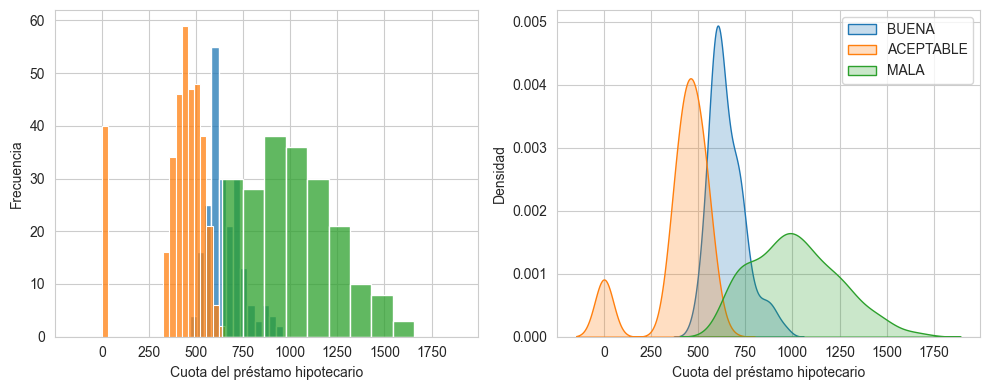

In [156]:
df=df_merged
var = 'Cuota_ptm'
var_title = 'Cuota del préstamo hipotecario'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_BUENA, x=var, label="BUENA", kde=False, ax=ax[0])
sns.histplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", kde=False, ax=ax[0])
sns.histplot(data=df_MALA, x=var, label="MALA", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_BUENA, x=var, label="BUENA", fill=True, ax=ax[1])
sns.kdeplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", fill=True, ax=ax[1])
sns.kdeplot(data=df_MALA, x=var, label="MALA", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

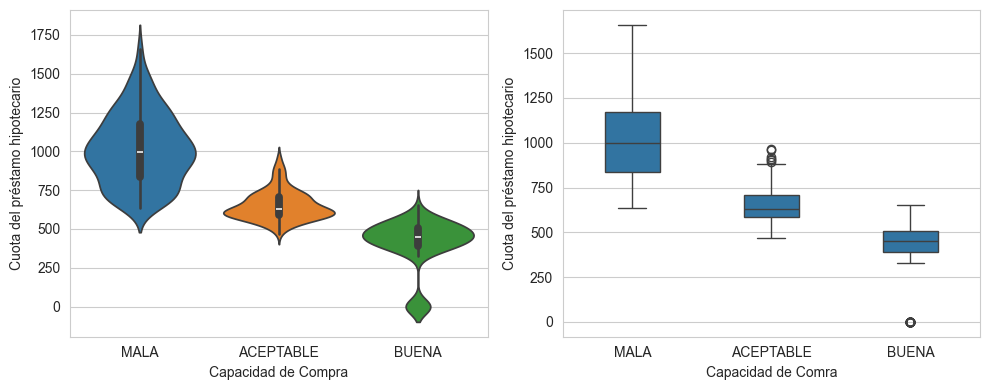

In [157]:
df=df_merged
var = 'Cuota_ptm'
var_title = 'Cuota del préstamo hipotecario'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='Etiqueta', y=var, ax=ax[0], hue='Etiqueta')
ax[0].set_xlabel('Capacidad de Compra')
ax[0].set_ylabel(var_title)
# ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='Etiqueta', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Capacidad de Comra')
ax[1].set_ylabel(var_title)

plt.tight_layout()

### 3.4 NÚMERO DE COMPRAVENTAS VS CATEGORIA DE ACCESO A VIVIENDA

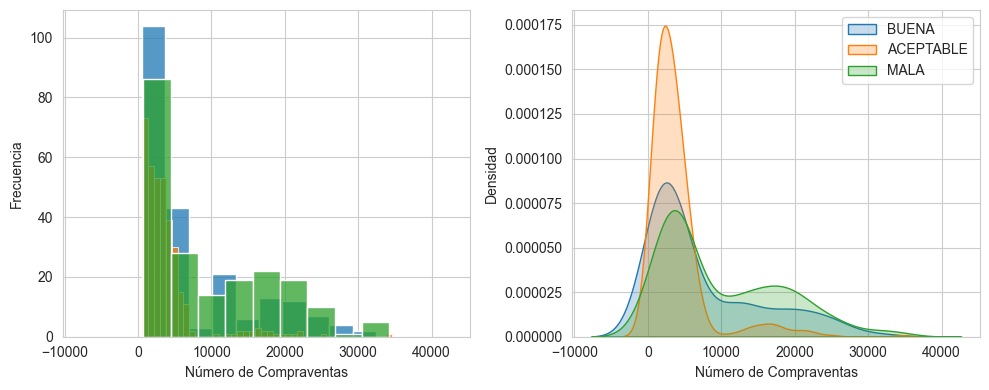

In [158]:
df=df_merged
var = 'Compraventas'
var_title = 'Número de Compraventas'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_BUENA, x=var, label="BUENA", kde=False, ax=ax[0])
sns.histplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", kde=False, ax=ax[0])
sns.histplot(data=df_MALA, x=var, label="MALA", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_BUENA, x=var, label="BUENA", fill=True, ax=ax[1])
sns.kdeplot(data=df_ACEPTABLE, x=var, label="ACEPTABLE", fill=True, ax=ax[1])
sns.kdeplot(data=df_MALA, x=var, label="MALA", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

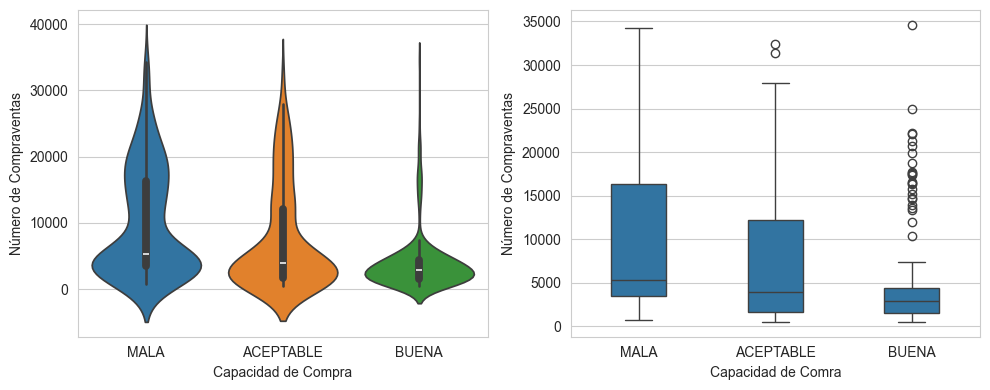

In [159]:
df=df_merged
var = 'Compraventas'
var_title = 'Número de Compraventas'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='Etiqueta', y=var, ax=ax[0], hue='Etiqueta')
ax[0].set_xlabel('Capacidad de Compra')
ax[0].set_ylabel(var_title)
# ax[0].get_legend().remove()

# Plotea el boxplot
sns.boxplot(data=df, x='Etiqueta', y=var, ax=ax[1], width=.4)
ax[1].set_xlabel('Capacidad de Comra')
ax[1].set_ylabel(var_title)

plt.tight_layout()

## 4. Correlación entre  más de dos variables (ampliación del Análisis Multivariable)

ENTRE TODAS LAS VARIABLES:

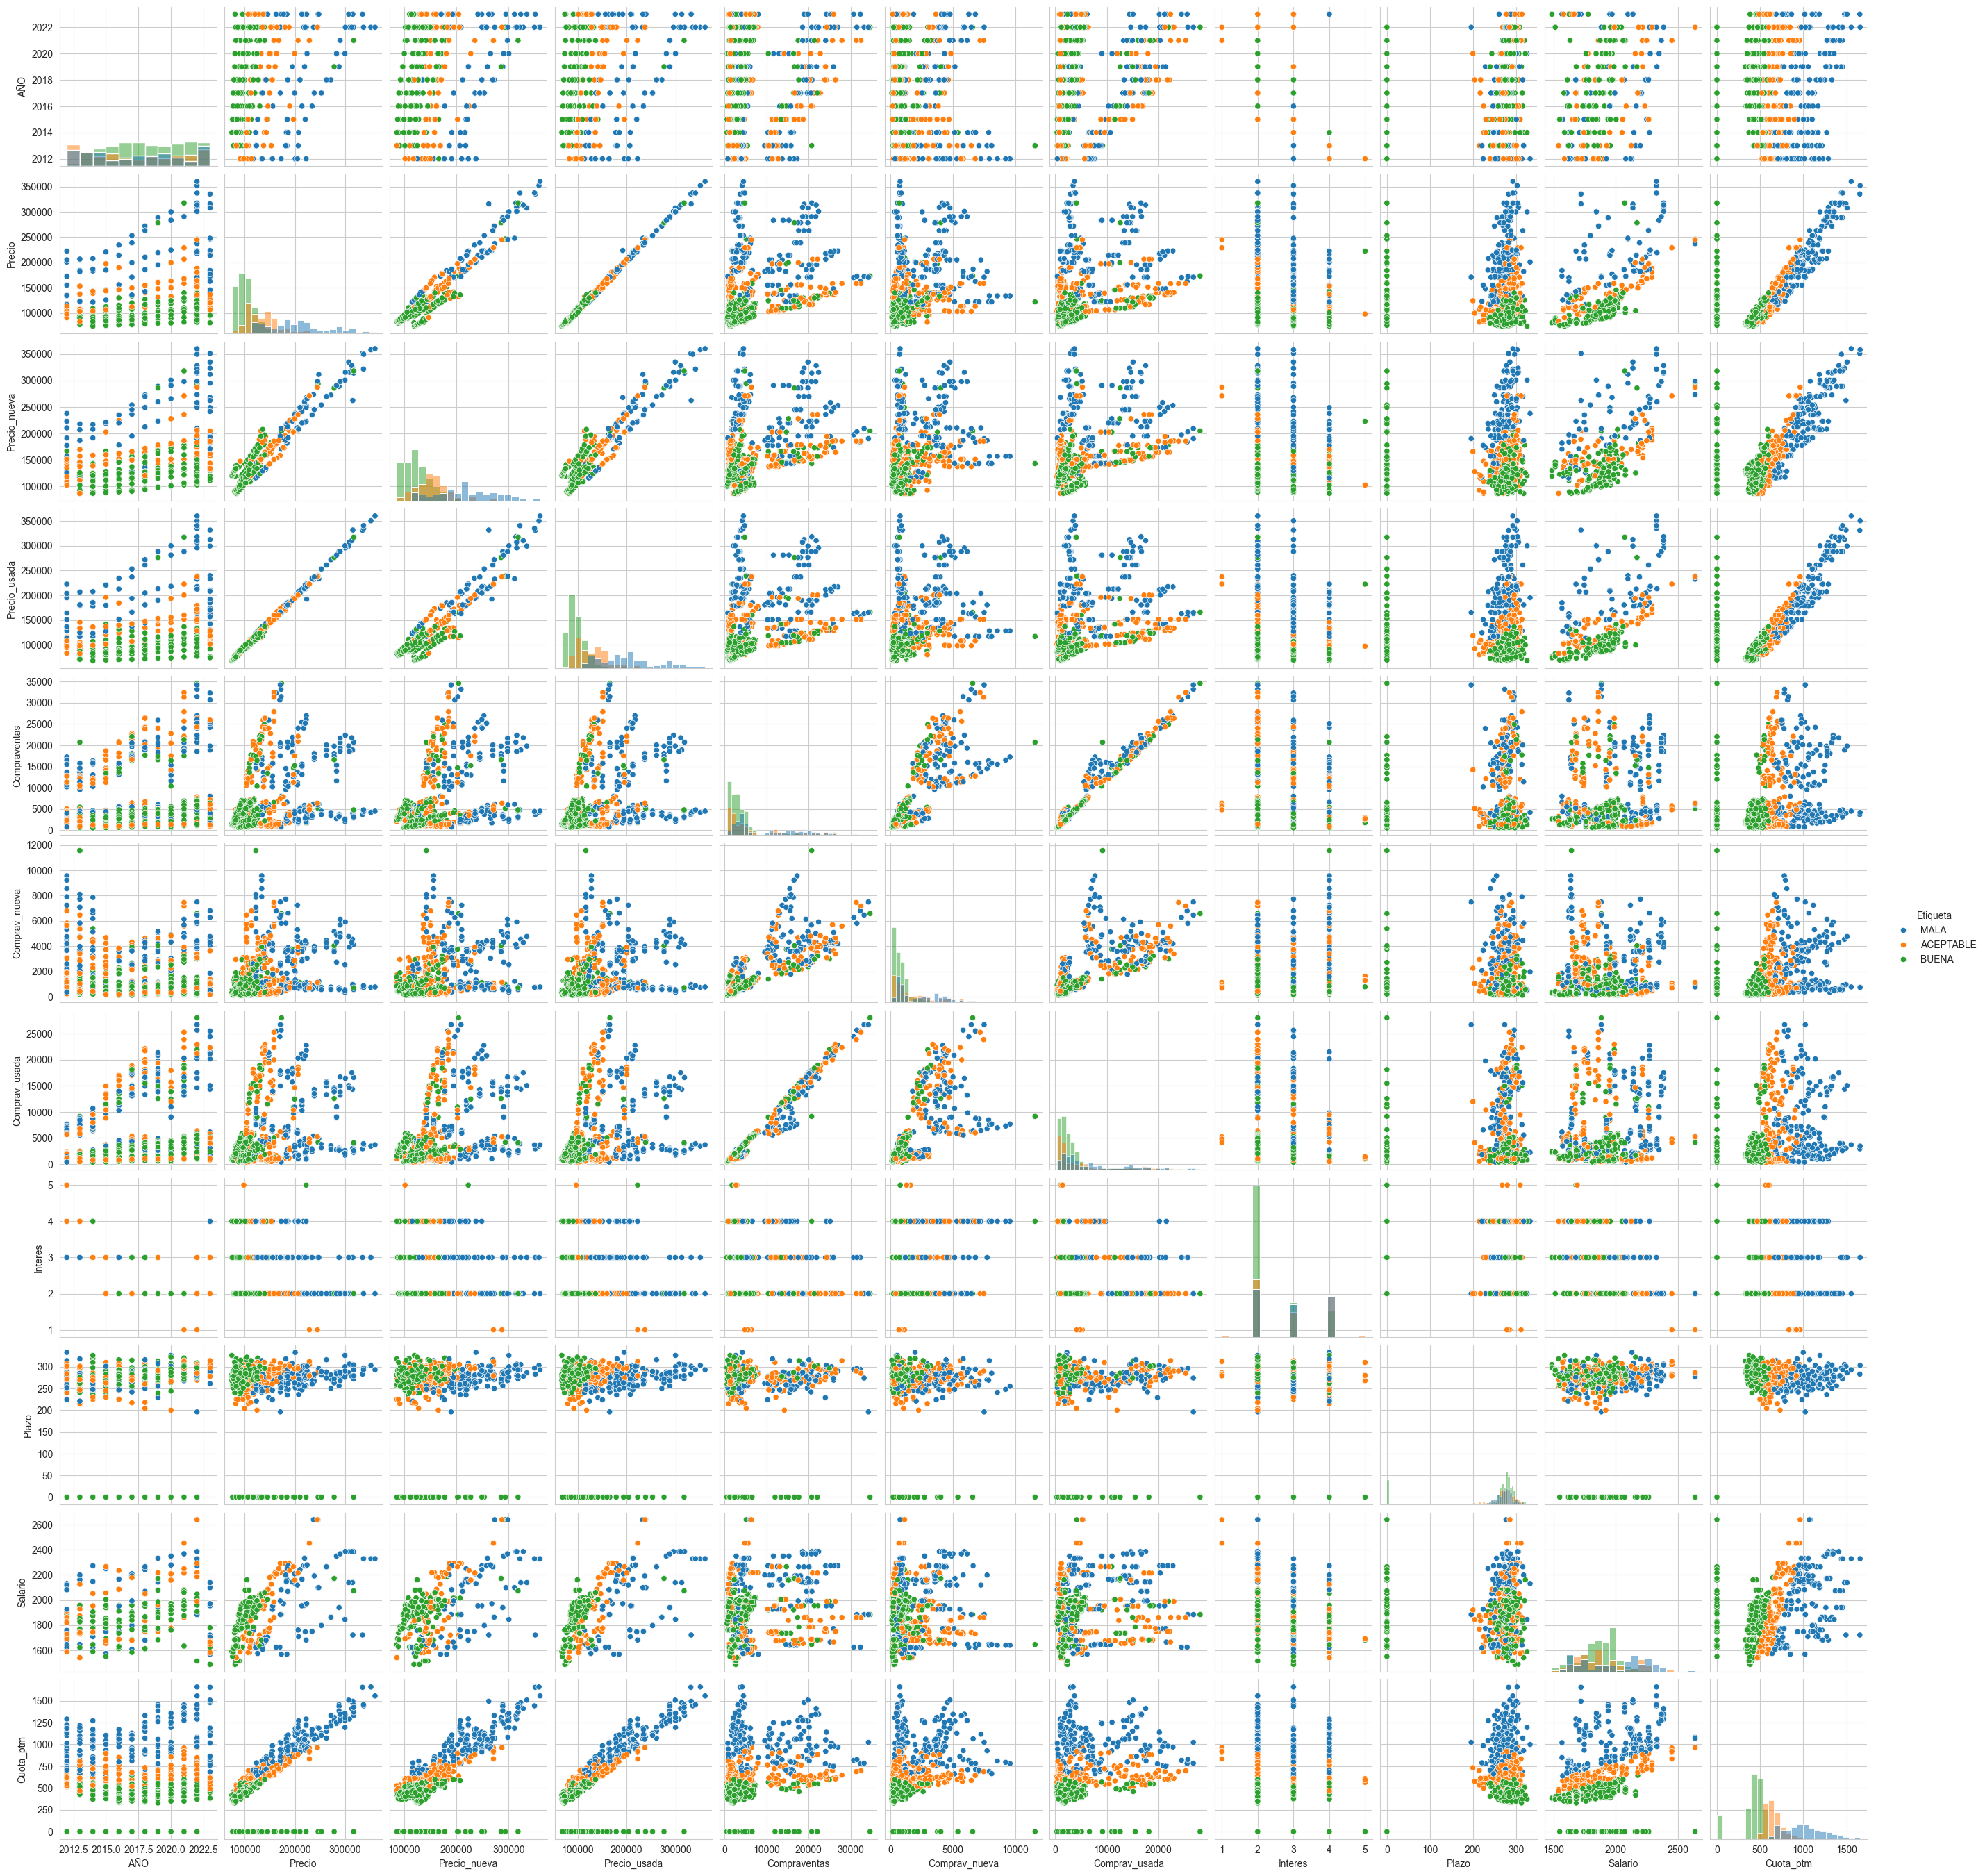

In [160]:
df=df_merged
sns.pairplot(df, hue="Etiqueta", diag_kind="hist")

Aunque esta gráfica posee gran cantidad de información, el entendimiento de la misma puede ser complejo, por lo que vamos a utilizar herramientas estadísticas como el coeficiente de correlación de Pearson, que proporciona una medida cuantitativa de la fuerza y dirección de la relación entre dos variables. 

- Un valor cercano a +1 indica una correlación positiva fuerte, un valor cercano a -1 indica una correlación negativa fuerte, y un valor cercano a 0 indica una correlación débil o nula.

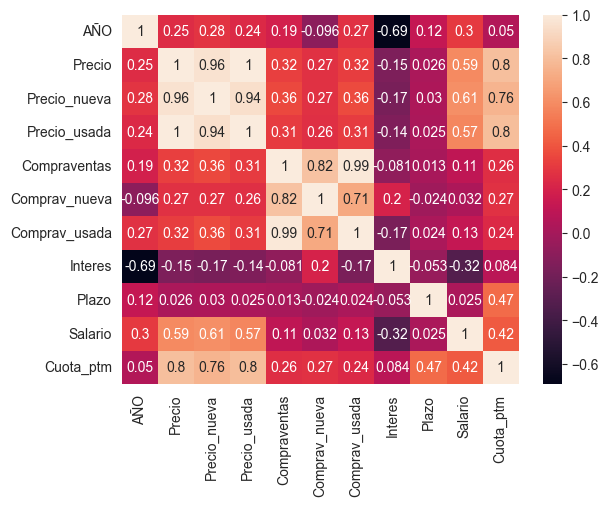

In [161]:
df=df_merged
sns.heatmap(df.corr(numeric_only= True), annot= True);


Ninguna de las características tiene una correlación fuerte con otra, lo que significa que cada característica contribuye de manera independiente a la predicción y puede darnos cierta ventaja para la riqueza del futuro modelo.

> Según la data analizada, en sentido positivo tenemos relacionada:
- PRECIO vs CUOTA PRESTAMO
- COMPRAVENTAS vs PRECIO
- CUOTA PRESTAMO vs COMPRAVENTAS

>En sentido negativo tenemos relacionada:
- TIPO DE INTERES vs SALARIO
- PRECIO vs TIPO INTERES
- COMPRAVENTAS vs TIPO INTERES

Obviamos las propias de un prestamo hipotecario como AÑO vs TIPO INTERES, INTERES vs PLAZO etc, para evitar redundancia.

El futuro aporte de data complementaria, (que en caso extremo podria compeletarse también con datos sinteticos), evidenciará correlaciones más definidas. 

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Seguidamente, procedemos a analizar por pares de la variables más relevantes:

Recordar en este punto el tipo de correlaciones:

> Correlación Positiva: [+] & [+]
> Aumento de una variable genera que aumente la otra.  

> Correlación Negativa: [+] & [-]
> Aumento de una variable genera que disminuya la otra: .

> Correlación Débil o Nula: [~]
> No hay una relación clara entre ambas variables, o que están influenciadas por otros factores que pueden contrarrestarse entre sí.


### 4.1 Precio vs Cuota Prestamo

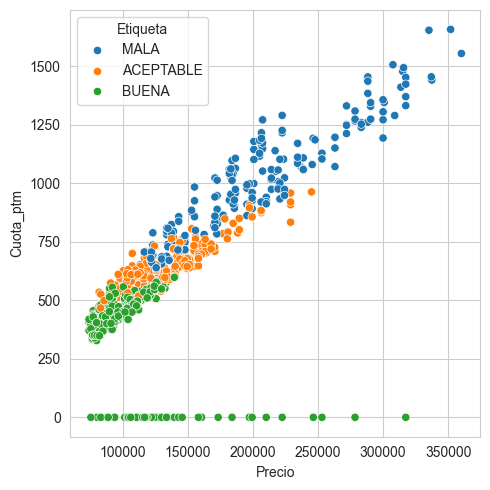

In [162]:
df=df_merged
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Precio", y="Cuota_ptm", ax=ax, hue="Etiqueta")
plt.tight_layout()

La alineación de los datos en una diagonal de 45 grados, evidencia la clara correlación de estas dos variables, estando realcionas de forma positiva. Por otra parte, en base a la categorización en tres grupos de las comunidades, observamos tambien que el precio y esfuerzo economico es mayor, en aquellas comunidades más tendionadas.

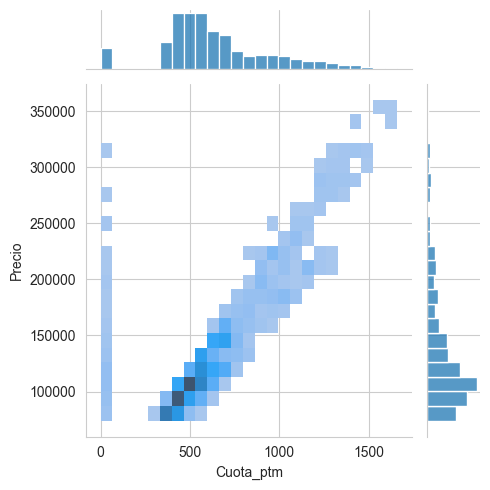

In [163]:
df=df_merged
sns.jointplot(data=df, x="Cuota_ptm", y="Precio", kind='hist', height=5)
plt.tight_layout()


La cuota del préstamo está directamente relacionada con el precio de la vivienda, en el sentido de que, por lo general, a medida que el precio de la vivienda aumenta, la cuota del préstamo también tiende a aumentar. Esto se debe a que necesitas pedir un préstamo más grande para comprar una vivienda más cara. En otras palabras, la cuota mensual del préstamo será mayor si el precio de la vivienda es alto.


### 4.2. Compraventas vs Precio

Esta relación es un indicador clave para evaluar la salud y la dinámica de un mercado inmobiliario en particular, ya que refleja la interacción entre la oferta y la demanda de viviendas.

La relación entre estas dos variables se puede resumir de la siguiente manera:

> -Impacto de las Compraventas en los Precios de las Propiedades: Un aumento en las compraventas suele estar asociado con una mayor demanda de viviendas. Cuando la demanda supera la oferta en un mercado inmobiliario, es probable que los precios de las propiedades aumenten. Los compradores compiten por un inventario limitado, lo que puede resultar en un aumento en los precios.

> -Impacto de los Precios de las Propiedades en las Compraventas: Por otro lado, los precios de las propiedades también influyen en las compraventas. Cuando los precios de las viviendas son altos, la asequibilidad se reduce y algunos compradores pueden ser excluidos del mercado. Esto puede llevar a una disminución en las compraventas, ya que menos personas pueden permitirse comprar viviendas.

En resumen, la relación entre las compraventas y los precios de las propiedades en el ciclo inmobiliario residencial es una relación bidireccional. Los cambios en las compraventas pueden influir en los precios de las viviendas, y a su vez, los cambios en los precios de las viviendas pueden influir en las compraventas. 


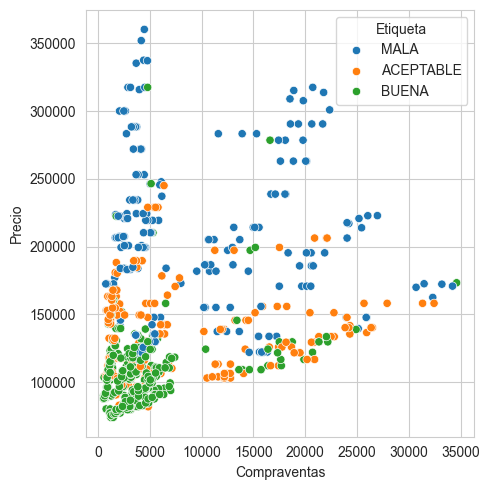

In [164]:
df=df_merged
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Compraventas", y="Precio", ax=ax, hue="Etiqueta")
plt.tight_layout()

La correlacion entre Compraventas y Precio es variable [~] motivada por:

- Correlación Positiva: 
A medida que las compraventas aumentan, los precios también tienden a subir. Esto sugiere una relación directa donde una mayor demanda conduce a precios más altos. 
Esta correlación es común en fases de auge del ciclo inmobiliario.

- Correlación Negativa: 
A medida que las compraventas aumentan, los precios tienden a disminuir. 
Esto puede ocurrir en fases de declive del ciclo inmobiliario, donde una menor demanda provoca una presión a la baja en los precios.

- Correlación Débil o Nula: 
Están influenciadas por otros factores, que pueden contrarrestarse entre sí.
Otros factores, como la oferta y la demanda, la economía, la política gubernamental y las condiciones locales, también desempeñan un papel importante en esta relación.


Oferta y Demanda: La relación entre las compraventas y los precios también está influenciada por la oferta y la demanda. Cuando la demanda supera a la oferta, los precios tienden a subir, y viceversa. Si hay más compradores que propiedades disponibles, es probable que los precios aumenten, lo que a su vez puede estimular las compraventas.

En la grafica superior, se evidencia además que en el periodo analizado existe cierta dispersión entre compraventas y precios, si bien las comunidades con buena capacidad de compra de vivienda, se presentan ventas mas contenidas en importe y precio, mientras que las catagorizadas como aceptables, se mueven en un rango medio, con más compraventas de menos importe. En las comunidades más tensionadas, en cambio, se agrupa un mayor numero de compraventas, de viviendas de mayor importe.

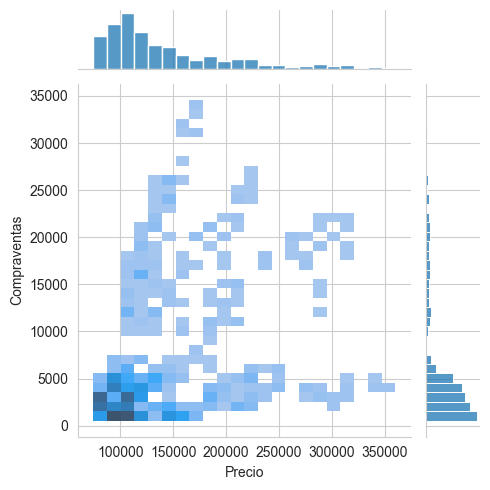

In [165]:
df=df_merged
sns.jointplot(data=df, x="Precio", y="Compraventas", kind='hist', height=5)
plt.tight_layout()

Pese a la dispersión general antes descrita, se observa que la maxima confluencia de compraventas y precio, se produce en las viviendas más economicas. A partir de ahí mas compraventas en pisos de importe medio, y menos en los de importe superior.

### 4.3. Compraventas vs Cuota Prestamo

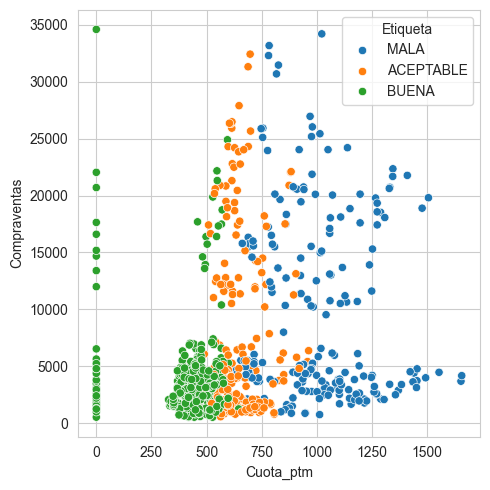

In [166]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Cuota_ptm", y="Compraventas", ax=ax, hue="Etiqueta")
plt.tight_layout()

Observando la gráfica se obtiene una lectura inmediata que indica que en las comunidades donde la capacidad de compra es mejor, la cuotas de prestamos son inferiores y el volumen de compraventas también y vicebersa.

Si queremos analizar solamente los aceptables, por ejemplo:

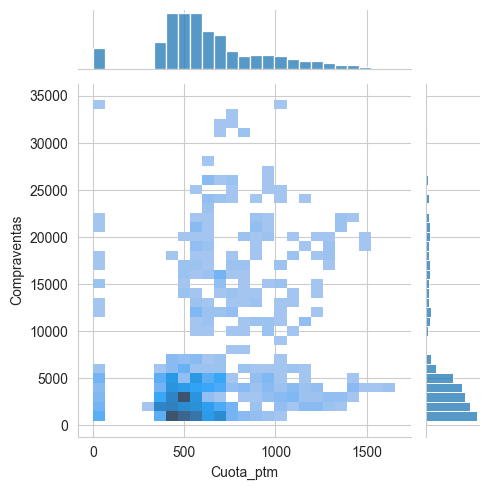

In [167]:
df=df_merged
sns.jointplot(data=df, x="Cuota_ptm", y="Compraventas", kind='hist', height=5)
plt.tight_layout()

La relación entre las compraventas y las cuotas de préstamos es un ejemplo de retroalimentación en el mercado inmobiliario, donde ambas variables pueden influirse mutuamente. Los cambios en una variable pueden desencadenar cambios en la otra, lo que hace que estas dos variables estén estrechamente relacionadas.

La relación entre estas dos variables puede describirse de la siguiente manera:

> **Impacto de las Compraventas en las Cuotas de Préstamos**: Un aumento en las compraventas puede influir en las cuotas de préstamos de varias maneras. Si la demanda de viviendas es alta y las propiedades se venden a precios más altos, esto puede llevar a una mayor competencia y, en última instancia, a tasas de interés más altas. Las tasas de interés más altas pueden resultar en cuotas de préstamos más costosas para los compradores, lo que podría afectar su capacidad de compra. Además, un aumento en las compraventas podría aumentar la demanda de préstamos, lo que podría influir en las tasas de interés.

> **Impacto de las Cuotas de Préstamos en las Compraventas**: Por otro lado, las cuotas de préstamos también pueden influir en las compraventas. Si las cuotas de préstamos son asequibles y las tasas de interés son bajas, esto puede hacer que sea más atractivo para los compradores potenciales adquirir una vivienda. Cuotas de préstamos más bajas pueden aumentar la asequibilidad y la demanda de viviendas, lo que, a su vez, puede impulsar un aumento en las compraventas.

### 4.3 Precio vs Salario Medio

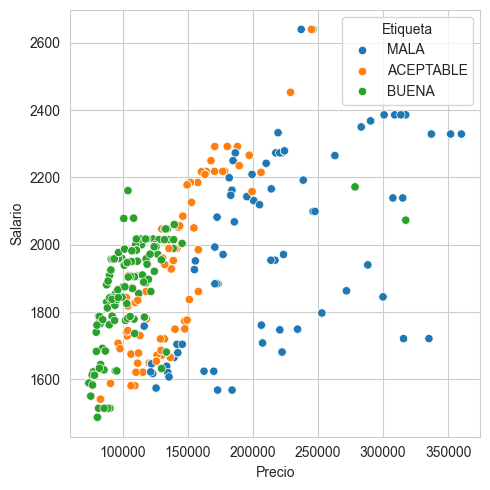

In [168]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(data=df, x="Precio", y="Salario", ax=ax, hue="Etiqueta")
plt.tight_layout()

La relación entre estas dos variables se puede resumir de la siguiente manera:

> **Impacto de los Precios de las Propiedades en los Salarios**: Cuando los precios de las propiedades son significativamente altos en relación con los salarios de la población, puede haber una falta de asequibilidad. Los compradores pueden enfrentar dificultades para comprar viviendas si los precios son inaccesibles en comparación con sus ingresos. Esto puede llevar a una desaceleración en la demanda de viviendas.

> **Impacto de los Salarios en los Precios de las Propiedades**: Los salarios también influyen en la capacidad de las personas para comprar viviendas. Si los salarios son altos en una determinada área, la población tendrá un mayor poder adquisitivo y estará dispuesta a gastar más en viviendas, lo que puede ejercer presión al alza sobre los precios. Por otro lado, si los salarios son bajos, la asequibilidad de la vivienda puede verse comprometida, lo que podría llevar a una presión a la baja sobre los precios.

En resumen, la relación entre los precios de las propiedades y los salarios es crucial para determinar la asequibilidad de la vivienda. Los precios de las viviendas y los salarios están interconectados, y cambios en una variable pueden influir en la otra. Esta relación es fundamental para comprender cómo los cambios económicos y demográficos afectan el mercado inmobiliario residencial, ya que impacta directamente en la capacidad de las personas para comprar viviendas.

Los aceptables

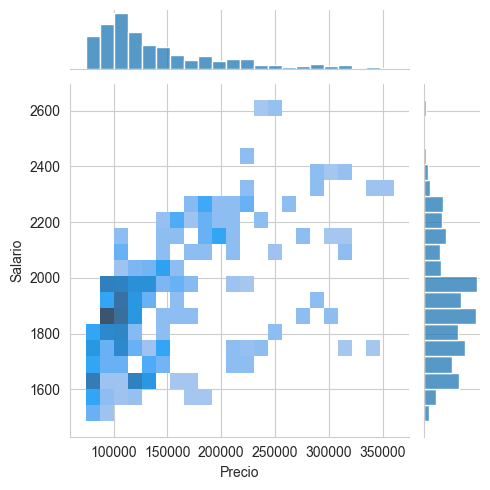

In [169]:
df=df_merged
sns.jointplot(data=df, x="Precio", y="Salario", kind='hist', height=5)
plt.tight_layout()

---

# `CONCLUSIONES FINALES:`

El mercado inmobiliario es sensible a las condiciones económicas  y sociales generales, (como el PIB y las tasas de interés, y los salarios medios) y su ciclo vital se determina por la relación entre las mismas con las que reflejan la dinamica entre la oferta y la demanda en el mercado, como las compraventas y el precio, que tienden a influirse mutuamente.

Es importante para los inversores y profesionales del sector inmobiliario comprender estas interrelaciones para tomar decisiones informadas en un mercado en constante evolución.

### INFLUENCIAS EN EL MERCADO INMOBILIARIO:

   1.	`**Demanda de Viviendas**` (Correlación Positiva, Bidireccional): La demanda de viviendas tiende a tener una correlación positiva con los precios de las propiedades. Cuando la demanda es alta, los precios tienden a aumentar, y viceversa. Esta relación es bidireccional, ya que los precios también pueden influir en la demanda. Cuando los precios son asequibles, la demanda tiende a aumentar.
   
   2.	`**Oferta de Viviendas**` (Correlación Negativa, Bidireccional): La oferta de viviendas tiene una correlación negativa con los precios. Cuando la oferta es baja en comparación con la demanda, los precios tienden a subir, y viceversa. La relación es bidireccional, ya que los precios también pueden influir en la oferta. Precios más altos pueden incentivar a los vendedores a poner más propiedades en el mercado.
   
   3.	`**Tasas de Interés**` (Correlación Variable, Bidireccional): Las tasas de interés tienen una correlación variable con el mercado inmobiliario. Las tasas de interés más bajas suelen impulsar la demanda de viviendas debido a cuotas de préstamos más asequibles, pero pueden ejercer presión al alza sobre los precios. Las tasas de interés más altas pueden reducir la demanda, lo que puede resultar en una disminución de los precios.
   
   4.	`**Salarios**` (Correlación Variable, Unidireccional): Los salarios pueden tener una correlación variable con el mercado inmobiliario. Si los salarios aumentan significativamente, esto puede impulsar la demanda de viviendas y, en última instancia, los precios. Sin embargo, una disminución en los salarios no necesariamente lleva a una disminución de los precios, ya que otros factores también influyen en el mercado.
   
   5.	`**Ciclo Económico**` (Correlación Variable, Bidireccional): El ciclo económico influye en el mercado inmobiliario. En tiempos de crecimiento económico, la demanda de viviendas tiende a aumentar, lo que puede elevar los precios. Durante recesiones, la demanda puede disminuir, lo que ejerce presión a la baja sobre los precios.
   
   6.	`**Políticas Gubernamentales**` (Correlación Variable, Bidireccional): Las políticas gubernamentales, como incentivos fiscales o regulaciones de zonificación, pueden influir en el mercado inmobiliario. Las políticas que fomentan la compra de viviendas suelen aumentar la demanda y los precios, mientras que las políticas restrictivas pueden tener el efecto contrario.





### RESUMEN DE DEPENDENCIAS ENTRE CADA UNA DE SUS VARIABLES:

| `Variables`     | `CMPRVN`    | `PRECIO`    | `T.INTERES`   | `PIB PAIS`    | `SALARIO`   |
|-----------------|-------------|-------------|---------------|---------------|-------------|
| `COMPRVN`       | ---         | VAR (BID)   | NEG (UNID)    | POS(UNID)     | POS(UNID)   |
| `PRECIO`        | VAR (BID)   | ---         | NEG (UNID)    | VAR           | VAR         |
| `T. INTERES`    | NEG (UNID)  | NEG (UNID)  | ---           | VAR           | VAR         |
| `PIB`           | POS (UNID)  | VAR         | VAR           | ---           | POS(UNID)   |
| `SALARIO MD.`   | POS (UNID)  | VAR         | VAR           | POS(UNID)     | ---         |


En la tabla:

- Correlación Positiva: [+] & [+] Aumento de una variable genera que aumente la otra.
- Correlación Negativa: [+] & [-] Aumento de una variable genera que disminuya la otra.
- Correlación Débil o Nula: [~] No hay una relación clara entre ambas variables, o que están influenciadas por otros factores que pueden contrarrestarse entre sí.

- (UNID) indica una relación unidireccional, donde un cambio en una variable afecta a la otra, pero no necesariamente al revés.
- (BID) indica una relación bidireccional, donde los cambios en ambas variables se influyen mutuamente.

En relaciones variables, la dirección puede cambiar dependiendo de otras condiciones o factores.




1. `**COMPRAVENTAS**`:

   - Relación variable con el `**precio**`: La relación entre compraventas y precios puede variar según el mercado y otros factores. En La relación entre compraventas y precios puede variar según el mercado y otros factores. En ciclos positivos correlación positiva y bidireccional, que se invierte en ciclos negativos.
   - Inversamente relacionado con las `**tasas/tipo de interés**`: Tasas más bajas suelen impulsar las compraventas.
   - Positivamente relacionado con el `**PIB del país**`: Un mayor PIB suele aumentar la demanda de propiedades.
   - Positivamente relacionado con el `**Salario Medio**`: Cuando los salarios son más altos, las personas tienen un mayor poder adquisitivo, lo que generalmente se traduce en una mayor capacidad para comprar viviendas.

--- 
2. `**PRECIO**`:

   - Positivamente relacionado con las `**compraventas**`: Cuando las ventas son altas, los precios tienden a subir debido a la demanda.
   - Inversamente relacionado con las `**tasas/tipo de interés**`: Tasas más altas pueden reducir la demanda y ejercer presión sobre los precios.
   - Relación variable con el `**PIB del país**`: La relación entre precios y PIB puede depender de diversos factores locales.
   - Relación variable con el `**Salario Medio**`: En general, un aumento en los salarios puede influir en el aumento de los precios de las viviendas, sin embargo, la relación puede no ser lineal y depende de otros factores como la oferta y la demanda en la región. 

---
3. `**TASA/TIPO INTERES**`:

   - Inversamente relacionado con las `**compraventas**`: Tasas más bajas suelen aumentar la demanda de propiedades.
   - Inversamente relacionado con el `**precio**`: Tasas más altas pueden reducir la demanda y los precios.
   - Relación variable con el `**PIB del país**`: Las tasas de interés pueden variar debido a la política monetaria y la inflación.
   - Relación variable con el `**Salario Medio**`: Si los salarios aumentan y, al mismo tiempo, las tasas de interés son bajas, podría haber una correlación positiva, ya que las personas pueden obtener hipotecas a tasas asequibles. Sin embargo, si los salarios aumentan pero las tasas de interés también aumentan significativamente, la correlación podría volverse negativa, ya que los costos de financiación aumentan.

---
4. `**SALARIO MEDIO**`:

   - Positivamente relacionado con las `**compraventas**`: A salarios más altos, mayor poder adquisitivo, lo que habitualmente se traduce en mayor capacidad de comprar viviendas.
   - Variable relación con el `**precio**`: La relación entre el Salario y los precios puede depender de factores locales y económicos.
   - Variable relación con las `**tasas de interés**`: Si los salarios aumentan y, al mismo tiempo, las tasas de interés son bajas, podría haber una correlación positiva, ya que las personas pueden obtener hipotecas a tasas asequibles. Sin embargo, si los salarios aumentan pero las tasas de interés también aumentan significativamente, la correlación podría volverse negativa, ya que los costos de financiación 
   - Positivamente relacionado con el `**PIB**`: Cuando los salarios son más altos, suele haber un mayor poder adquisitivo en la población, lo que puede impulsar el crecimiento económico y, por lo tanto, el PIB. 

---
5. `**PIB DEL PAIS**`:

   - Positivamente relacionado con las `**compraventas**`: Un mayor PIB puede impulsar la demanda en el mercado inmobiliario.
   - Variable relación con el `**precio**`: La relación entre el PIB y los precios puede depender de factores locales y económicos.
   - Variable relación con las `**tasas de interés**`: La política monetaria puede afectar el PIB y, por lo tanto, influir en las tasas de interés.
   - Positivamente relacionado con el `**Salario Medio**`: Cuando los salarios son más altos, suele haber un mayor poder adquisitivo en la población, lo que puede impulsar el crecimiento económico y, por lo tanto, el PIB.

---

Es importante destacar que estas relaciones pueden ser influenciadas por factores locales, políticas económicas y ciclos del mercado, y no siempre son lineales ni constantes. Además, las relaciones pueden variar según la región y la situación económica. 

Por lo tanto, es importante considerar cada relación de manera individual y evaluar su impacto en el contexto específico en el que se encuentre.

<b> El presente proyecto, a supuesto una primera aproximación al futuro modelo predictivo que se piensa desarrollar, poniendo en evidencia las carencias sobre las que habrá que actuar, ampliando y vinculando la data, a través de nuevas fuentes que enriquezcan el propio modelo.